In [2]:
import math
from math import log, cos, sin

In [3]:
def ln(x):
    return log(x, math.e)

In [4]:
def func(x):
    return ln(cos(x*x)) + sin(x)

In [5]:
def d_func(x):
    return -(sin(x * x) * 2 * x) / cos(x*x) + cos(x)

In [6]:
def h_func(x):
    return (func(x+1e-9) - func(x)) / 1e-9

In [7]:
d_func(5)

1.618926255678585

In [8]:
h_func(5)

1.6189263263299836

In [9]:
from collections import deque

def DFS(node):
    if not len(node.vars):
        return [node]
    ordered_vars = []
    for root in node.vars:
        ordered_vars += DFS(root)
    ordered_vars.append(node)
    return ordered_vars

def topological_DFS(node, visited=None, ordered_nodes=None, levels=None, level=None, key=lambda x: x.vars):
    if visited is None:
        visited = set()
    if ordered_nodes is None:
        ordered_nodes = []
    if levels is None:
        levels = []
    if level is None:
        level = 0

    if node not in visited:
        for root in key(node):
            topological_DFS(root, visited, ordered_nodes, levels, level + 1, key=key)
        ordered_nodes.append(node)
        levels.append(level)
        visited.add(node)
    return ordered_nodes, levels

def branchless_DFS(node, visited=None, ordered_nodes=None, levels=None, level=None, key=lambda x: x.vars):
    if visited is None:
        visited = set()
    if ordered_nodes is None:
        ordered_nodes = []
    if levels is None:
        levels = []
    if level is None:
        level = 0

    if node not in visited:
        key_roots = key(node)
        if node.op == "merge":
            key_roots = [key_roots[not node.kwarge["condition"]]]
        for root in key_roots:
            topological_DFS(root, visited, ordered_nodes, levels, level + 1, key=key)
        ordered_nodes.append(node)
        levels.append(level)
        visited.add(node)
    return ordered_nodes, levels

def BFS(node):
    """
    Perform BFS traversal on a graph represented by OpNode.

    Parameters:
    - root: The starting node (OpNode).

    Returns:
    - result: A list of node names in BFS order.
    """
    if node is None:
        return []
    
    visited = set()
    queue = deque([node])
    result = []

    while queue:
        current_node = queue.popleft()
        if current_node not in visited:
            # Process current node
            result.append(current_node)
            visited.add(current_node)

            # Add children to the queue
            for child in current_node.vars:
                if child not in visited:
                    queue.append(child)

    return result



In [10]:
import numpy as np
arr = np.random.randint(0,9, (5,10))


In [11]:
arr

array([[4, 8, 2, 7, 8, 3, 7, 5, 0, 0],
       [5, 3, 4, 0, 7, 7, 7, 7, 7, 1],
       [7, 0, 0, 5, 4, 2, 7, 8, 2, 8],
       [5, 8, 3, 6, 8, 5, 3, 3, 2, 0],
       [2, 6, 7, 8, 8, 6, 3, 3, 2, 2]])

In [12]:
split_arrs = np.split(arr, (1, 3, 8), axis=-1)
split_arrs

[array([[4],
        [5],
        [7],
        [5],
        [2]]),
 array([[8, 2],
        [3, 4],
        [0, 0],
        [8, 3],
        [6, 7]]),
 array([[7, 8, 3, 7, 5],
        [0, 7, 7, 7, 7],
        [5, 4, 2, 7, 8],
        [6, 8, 5, 3, 3],
        [8, 8, 6, 3, 3]]),
 array([[0, 0],
        [7, 1],
        [2, 8],
        [2, 0],
        [2, 2]])]

In [13]:
def np_set_range(array, value, rng, axis=-1):
    slices = [slice(None)] * arr.ndim
    slices[axis] = slice(*rng)
    slices = tuple(slices)
    array[slices] = value

In [14]:
arr[(slice(None), slice(5, -2))]

array([[3, 7, 5],
       [7, 7, 7],
       [2, 7, 8],
       [5, 3, 3],
       [6, 3, 3]])

In [15]:
axis = -1
x_indices = [x_idx for x_idx, node in enumerate(split_arrs) if node.shape[axis] == 2]
print(x_indices)
cumusum = [0] + list(np.cumsum([rr.shape[axis] for rr in split_arrs]))
print(cumusum)
deriv = np.zeros(arr.shape)
print(deriv) 
ranges = [(cumusum[idx], cumusum[idx+1]) for idx in x_indices]
for rng in ranges:
    slices = [slice(None)] * arr.ndim
    slices[axis] = slice(*rng)
    slices = tuple(slices)
    deriv[slices] = 1

print(deriv)
print(np.split(deriv, cumusum[1:-1], axis=axis))

[1, 3]
[0, 1, 3, 8, 10]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 1. 0. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 0. 0. 0. 1. 1.]]
[array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]]), array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]]), array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]]), array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])]


In [16]:
import numpy as np

def im2col(input_tensor, kernal_shape, stride=1, padding=0):
    batch_size, img_height, img_width, num_channels = input_tensor.shape
    filter_height, filter_width = kernal_shape

    # Compute output dimensions
    out_height = (img_height + 2 * padding - filter_height) // stride + 1
    out_width = (img_width + 2 * padding - filter_width) // stride + 1

    # Add padding to the input
    if padding > 0:
        input_tensor = np.pad(
            input_tensor,
            ((0, 0), (0, 0), (padding, padding), (padding, padding)),
            mode='constant',
            constant_values=0
        )

    # Create the im2col matrix
    col_matrix = np.zeros((batch_size, out_height, out_width, filter_height, filter_width, num_channels))

    # Fill the im2col matrix
    for h in range(filter_height):
        for w in range(filter_width):
            col_matrix[:, :, :, h, w, :] = input_tensor[
                :, 
                h:h + stride * out_height:stride, 
                w:w + stride * out_width:stride,
                :
            ]
    # Reshape to create the column matrix
    col_matrix = col_matrix.transpose(0, 1, 2, 5, 3, 4) 
    col_matrix = col_matrix.reshape(batch_size, out_height * out_width, -1) 
    return col_matrix


def col2im(col_matrix, input_shape, kernal_shape, stride=1, padding=0):
    batch_size, img_height, img_width, num_channels = input_shape
    filter_height, filter_width = kernal_shape

    # Compute output dimensions
    out_height = (img_height + 2 * padding - filter_height) // stride + 1
    out_width = (img_width + 2 * padding - filter_width) // stride + 1

    # Initialize output tensor with zeros
    padded_height = img_height + 2 * padding
    padded_width = img_width + 2 * padding
    output = np.zeros((batch_size, padded_height, padded_width, num_channels))

    # Reshape col_matrix to extract patches
    # (batch_size, out_height, out_width, filter_height, filter_width, num_channels)
    col_matrix = col_matrix.reshape(batch_size, out_height, out_width, num_channels, filter_height, filter_width)
    col_matrix = col_matrix.transpose(0, 1, 2, 4, 5, 3) 

    # Accumulate gradients for each patch
    for h in range(filter_height):
        for w in range(filter_width):
            output[:, h:h + stride * out_height:stride, w:w + stride * out_width:stride, :] += col_matrix[:, :, :, h, w, :]

    # Remove padding if applied
    if padding > 0:
        output = output[:, padding:-padding, padding:-padding, :]

    return output

def im2col_pool(input_tensor, pool_shape, stride=2):
    N, H, W, C = input_tensor.shape
    pool_h, pool_w = pool_shape
    out_h = (H - pool_h) // stride + 1
    out_w = (W - pool_w) // stride + 1

    col = np.zeros((N, out_h, out_w, pool_h, pool_w, C))

    for y in range(pool_h):
        y_max = y + stride * out_h
        for x in range(pool_w):
            x_max = x + stride * out_w
            col[:, :, :, y, x, :] = input_tensor[:, y:y_max:stride, x:x_max:stride, :]

    col = col.transpose(0, 1, 2, 5, 3, 4).reshape(N, C * out_h * out_w, -1)
    return col

import numpy as np

def col2im_pool(col, input_shape, pool_shape, stride=2):
    N, H, W, C = input_shape
    pool_h, pool_w = pool_shape
    out_h = (H - pool_h) // stride + 1
    out_w = (W - pool_w) // stride + 1
    
    col = col.reshape(N, out_h, out_w, C, pool_h, pool_w).transpose(0, 1, 2, 4, 5, 3)
    
    img = np.zeros((N, H, W, C))
    
    for y in range(pool_h):
        y_max = y + stride * out_h
        for x in range(pool_w):
            x_max = x + stride * out_w
            img[:, y:y_max:stride, x:x_max:stride, :] += col[:, :, :, y, x, :]
    
    return img



In [35]:
import uuid
import numpy as np

from collections.abc import Iterable

def get_broadcast_shape(shape1, shape2):
    len_diff = abs(len(shape1) - len(shape2))
    if len(shape1) > len(shape2):
        shape2 = (1,) * len_diff + shape2
    else:
        shape1 = (1,) * len_diff + shape1

    broadcast_shape = []
    for dim1, dim2 in zip(shape1, shape2):
        if dim1 == dim2 or dim1 == 1 or dim2 == 1:
            broadcast_shape.append(max(dim1, dim2))
        else:
            raise ValueError(f"Shapes {shape1} and {shape2} are not broadcastable")
    
    return tuple(broadcast_shape)


def eval_reduce_semi_broadcast_shape(og_shape, axis):
    if axis is None: return tuple([1]*len(og_shape))
    if type(axis) not in [tuple, list]: axis=(axis,)
    shape_ls = list(og_shape) 
    for ax in axis: shape_ls[ax] = 1
    semi_broadcasted_shape = tuple(shape_ls)
    return semi_broadcasted_shape

def infer_matmul_broadcast_shape(unbroadcasted_shape, output_shape): # einsum is too hard
    matmul_dims = unbroadcasted_shape[-2:]
    batch_dims = output_shape[:-2]

    broadcast_shape = batch_dims + matmul_dims
    
    return broadcast_shape

def matmul_batch_axes_match(input_shape, output_shape): # einsum is too hard
    return input_shape[:-2] == output_shape[:-2]

def infer_reduction_axis(shape, reduced_shape):
    len_diff = len(shape) - len(reduced_shape)
    if len_diff > 0:
        reduced_shape = (1,) * len_diff + reduced_shape
    
    # Identify the axes where the reduction occurred
    reduction_axes = [i for i, (r_dim, red_dim) in enumerate(zip(shape, reduced_shape)) if red_dim == 1 and r_dim != 1]
    
    return tuple(reduction_axes)

def broadcast_adjoint(adjoint, wrt, this):
    if type(wrt.val) != np.ndarray or wrt.val.size < this.val.size:
        reduce_axes = infer_reduction_axis(
            shape=this.val.shape,
            reduced_shape=wrt.val.shape
        )
        adjoint = adjoint.sum(axis=reduce_axes)
    return adjoint

dic = {"one": [], "two": []}

class OpNode:
    NUMERIC_TYPES = [
        int, float, np.bool_, np.int8,
        np.int16, np.int32, np.int64, np.uint8,
        np.uint16, np.uint32, np.uint64, np.float16,
        np.float32, np.float64, np.complex64, np.complex128,
    ]
    CONSTANT_TYPES = NUMERIC_TYPES + [np.ndarray]

    def __init__(self, op, prefix="", constant=None, is_input=False, **kwargs):
        if op == "const" and constant is None:
            raise Exception("Const node needs to be assigned a value !!")
        self.name = f"[{prefix}]{op}_{str(uuid.uuid4())}"
        self.op = op
        self.vars = []
        self.leafs = []
        self.val = constant
        self.adjoint = None if op != "const" else 0
        self.kwargs = kwargs
        self.is_input = is_input
        self.inputs = []
        self.outputs = []
        self.frozen = False
        self._cycle = None
        if "axis" in self.kwargs and type(self.kwargs["axis"]) not in [list, tuple]:
            self.kwargs["axis"] = (self.kwargs["axis"])

    def set_name(self, name):
        self.name = name
        return self

    def set_graph_inputs(self, inputs: list):
        self.inputs = inputs
        return self
    
    def append_graph_inputs(self, inputs: list):
        self.inputs = self.inputs + inputs
        return self
    
    def set_graph_outputs(self, outputs: list):
        self.outputs = outputs
        return self

    def substitute(self, val):
        if self.op == "const": raise Exception("You cannot assign a new value to constant node")
        self.val = val
        return self

    def __call__(self, *args):
        if len(args):
            self.vars = []
            for i, arg in enumerate(args):
                op_arg = arg
                if type(arg) in OpNode.CONSTANT_TYPES:
                    op_arg = OpNode("const", constant=arg)
                self.vars.append(op_arg)
                if self not in op_arg.leafs: op_arg.leafs.append(self)
        return self
    
    @property
    def cycle(self): return self._cycle

    @cycle.setter
    def cycle(self, cycle):
        if cycle.op != "var" or not cycle.is_input: raise Exception("Only a input var can be used as a cycle node")
        print("CYCLE "*100)
        self._cycle = cycle

    @staticmethod
    def _add(node1, node2):
        op_node1 = node1
        if type(node1) in OpNode.CONSTANT_TYPES:
            op_node1 = OpNode("const", constant=node1)
        op_node2 = node2
        if type(node2) in OpNode.CONSTANT_TYPES:
            op_node2 = OpNode("const", constant=node2)
        if op_node1 == op_node2 and node1 == op_node2:
            return OpNode("*")(OpNode("const", constant=2), op_node2)
        res = OpNode("+")(op_node1, op_node2)
        return res
    
    def __add__(self, other): return OpNode._add(self, other)
    def __radd__(self, other): return OpNode._add(other, self)

    @staticmethod
    def _mul(node1, node2):
        op_node1 = node1
        if type(node1) in OpNode.CONSTANT_TYPES:
            op_node1 = OpNode("const", constant=node1)
        op_node2 = node2
        if type(node2) in OpNode.CONSTANT_TYPES:
            op_node2 = OpNode("const", constant=node2)
        if op_node1 == op_node2 and node1 == op_node2:
            return OpNode("**")(op_node2, OpNode("const", constant=2))
        res = OpNode("*")(op_node1, op_node2)
        return res
    
    def __mul__(self, other): return OpNode._mul(self, other)
    def __rmul__(self, other): return OpNode._mul(other, self)

    @staticmethod
    def _matmul(node1, node2):
        op_node1 = node1
        if type(node1) in OpNode.CONSTANT_TYPES:
            op_node1 = OpNode("const", constant=node1)
        op_node2 = node2
        if type(node2) in OpNode.CONSTANT_TYPES:
            op_node2 = OpNode("const", constant=node2)
        res = OpNode("@")(op_node1, op_node2)
        return res
    
    def __matmul__(self, other): return OpNode._matmul(self, other)
    def __rmatmul__(self, other): return OpNode._matmul(other, self)

    @staticmethod
    def _sub(node1, node2):
        op_node1 = node1
        if type(node1) in OpNode.CONSTANT_TYPES:
            op_node1 = OpNode("const", constant=node1)
        op_node2 = node2
        if type(node2) in OpNode.CONSTANT_TYPES:
            op_node2 = OpNode("const", constant=node2)
        if op_node1 == op_node2 and node1 == op_node2:
            return OpNode("const", constant=0)
        res = OpNode("-")(op_node1, op_node2)
        return res
    
    def __sub__(self, other): return OpNode._sub(self, other)
    def __rsub__(self, other): return OpNode._sub(other, self)
    
    @staticmethod
    def _truediv(node1, node2):
        op_node1 = node1
        if type(node1) in OpNode.CONSTANT_TYPES:
            op_node1 = OpNode("const", constant=node1)
        op_node2 = node2
        if type(node2) in OpNode.CONSTANT_TYPES:
            op_node2 = OpNode("const", constant=node2)
        if op_node1 == op_node2 and node1 == op_node2:
            return OpNode("const", constant=1)
        res = OpNode("/")(op_node1, op_node2)
        return res
    
    def __truediv__(self, other): return OpNode._truediv(self, other)
    def __rtruediv__(self, other): return OpNode._truediv(other, self)
    
    @staticmethod
    def _pow(node1, node2):
        op_node1 = node1
        if type(node1) in OpNode.CONSTANT_TYPES:
            op_node1 = OpNode("const", constant=node1)
        op_node2 = node2
        if type(node2) in OpNode.CONSTANT_TYPES:
            op_node2 = OpNode("const", constant=node2)
        res = OpNode("**")(op_node1, op_node2)
        return res

    def __pow__(self, other): return OpNode._pow(self, other)
    def __rpow__(self, other): return OpNode._pow(other, self)

    def __neg__(self):
        return OpNode("neg")(self)

    def equals(self, other, **kwargs): return OpNode(op="==", **kwargs)(self, other)
    def sum(self, axis, keepdims, **kwargs): return OpNode(op="+", axis=axis, keepdims=keepdims, **kwargs)(self)
    def prod(self, axis, keepdims, **kwargs): return OpNode(op="*", axis=axis, keepdims=keepdims, **kwargs)(self)
    def mean(self, axis, keepdims, **kwargs): return OpNode(op="mean", axis=axis, keepdims=keepdims, **kwargs)(self)
    def max(self, axis, keepdims, **kwargs): return OpNode(op="max", axis=axis, keepdims=keepdims, **kwargs)(self)
    def min(self, axis, keepdims, **kwargs): return OpNode(op="min", axis=axis, keepdims=keepdims, **kwargs)(self)
    def dot(self, other, **kwargs): return OpNode(op="@")(self, other, **kwargs)
    def transpose(self, axes, **kwargs): return OpNode(op="T", axes=axes, **kwargs)(self)
    def T(self, axes, **kwargs): return OpNode(op="T", axes=axes, **kwargs)(self)
    def reshape(self, shape, **kwargs): return OpNode(op="reshape", shape=shape, **kwargs)(self)

    @property
    def shape(self):
        try: return self.val.shape
        except Exception as e: print(e)

    def partial_derivative(self, with_respect_to):
        if not len(self.vars): return None
        if with_respect_to not in self.vars: return 0
        if with_respect_to.op == "const": 
            if type(with_respect_to.val) == np.ndarray: return np.zeros(with_respect_to.val.shape)
            return 0

        # if not len(self.leafs): return 1
        match(self.op):
            case "const":
                return 0
            case "neg":
                if type(self.val) == np.ndarray:
                    return -1 * np.ones(self.val.shape)
                return -1
            case "=="|"equals"|">="|"gte"|">"|"gt"|"<="|"lte"|"<"|"lt":
                if type(self.val) == np.ndarray:
                    # partial = np.zeros(with_respect_to.val.shape) if type(with_respect_to.val) == np.ndarray else 0 # MIGHT COME BACK
                    partial = np.zeros(self.val.shape)
                    return partial
                return 0
            case "concat" | "concatenate":
                axis = self.kwargs.get("axis", -1)
                x_indices = [x_idx for x_idx, var in enumerate(self.vars) if var == with_respect_to]
                cumusum = [0] + list(np.cumsum([var.val.shape[axis] for var in self.vars]))
                partial = np.zeros(self.val.shape)
                ranges = [(cumusum[idx], cumusum[idx+1]) for idx in x_indices]
                for rng in ranges:
                    slices = [slice(None)] * self.val.ndim
                    slices[axis] = slice(*rng)
                    slices = tuple(slices)
                    partial[slices] = 1
                return partial
            case "mean" | "avg": # vars[2] should be reduced or vars[1] should be broadcasted
                if len(self.vars) == 1 and type(self.vars[0].val) == np.ndarray:
                    axis = self.kwargs.get("axis", None)
                    if axis is None: size = self.vars[0].val.size
                    else:
                        if not isinstance(axis, tuple): axis = (axis,)
                        size = np.prod([self.vars[0].val.shape[ax] for ax in axis])
                    return np.ones(self.vars[0].val.shape) / size
                count = 0
                for var in self.vars:
                    if var == with_respect_to:
                        count += 1
                if type(self.val) == np.ndarray:
                    partial = np.ones(with_respect_to.val.shape) * count / len(self.vars) if type(with_respect_to.val) == np.ndarray else count / len(self.vars)
                    return partial
                return count / len(self.vars)
            case "+" | "sum":
                if len(self.vars) == 1 and type(self.vars[0].val) == np.ndarray:
                    return np.ones(self.vars[0].val.shape)
                count = 0
                for var in self.vars:
                    if var == with_respect_to:
                        count += 1
                if type(self.val) == np.ndarray:
                    # partial = np.ones(with_respect_to.val.shape) * count if type(with_respect_to.val) == np.ndarray else count # MIGHT COME BACK
                    partial = np.ones(self.val.shape) * count
                    return partial
                return count
            case "-":
                if len(self.vars) != 2: raise Exception("minus op only accepts two inputs")
                scalar = 1
                if self.vars[0] == self.vars[1]: scalar = 0
                elif self.vars[0] == with_respect_to: scalar = 1
                else: scalar = -1
                if type(self.val) == np.ndarray:
                    # partial = np.ones(with_respect_to.val.shape) * scalar if type(with_respect_to.val) == np.ndarray else scalar # MIGHT COME BACK
                    partial = np.ones(self.val.shape) * scalar
                    return partial
                return scalar
            case "*" | "prod":
                if len(self.vars) == 1 and type(self.vars[0].val) == np.ndarray:
                    semi_broadcasted_shape = eval_reduce_semi_broadcast_shape(
                        og_shape=self.vars[0].val.shape,
                        axis=self.kwargs["axis"],
                    )
                    return self.val.reshape(semi_broadcasted_shape) / np.where(self.vars[0].val == 0, 1, self.vars[0].val)
                count = 0
                for var in self.vars:
                    if var == with_respect_to:
                        count += 1
                partial = count * self.val / np.where(with_respect_to.val == 0, 1, with_respect_to.val)
                return partial
            case "@" | "matmul":
                if type(self.vars[0].val) == np.ndarray and type(self.vars[1].val) == np.ndarray:
                    if self.vars[0] == with_respect_to:
                        ndim = self.vars[1].val.ndim
                        dims = list(range(ndim))
                        dims[-2], dims[-1] = dims[-1], dims[-2]
                        return self.vars[1].val.transpose(dims)
                    else:
                        ndim = self.vars[0].val.ndim
                        dims = list(range(ndim))
                        dims[-2], dims[-1] = dims[-1], dims[-2]
                        return self.vars[0].val.transpose(dims)
                else: raise Exception("matmul op only accepts two numpy array inputs")
            case "/":
                if len(self.vars) != 2: raise Exception("divide op only accepts two inputs")
                if self.vars[0] == self.vars[1]: ## and self.vars[0] == with_respect_to
                    if type(self.val) == np.ndarray:
                        # partial = np.zeros(with_respect_to.val.shape) if type(with_respect_to.val) == np.ndarray else 0 # MIGHT COME BACK
                        partial = np.zeros(self.val.shape)
                        return partial
                    return 0
                if self.vars[0] == with_respect_to:
                    partial = 1 / self.vars[1].val
                    return partial
                partial = -1 * self.vars[0].val / (with_respect_to.val ** 2)
                return partial
            case "**":
                if len(self.vars) != 2: raise Exception("pow op only accepts two inputs")

                base, exponent = self.vars

                # Case when both base and exponent are the same variable
                if base == exponent:  # This case is unusual but let's handle it
                    if base == with_respect_to:
                        return self.val * (1 + np.log(with_respect_to.val))
                    raise Exception("Unexpected case: both base and exponent are the same but not the target variable")

                # Case when differentiating with respect to the base
                if base == with_respect_to:
                    return exponent.val * (base.val ** (exponent.val - 1))

                # Case when differentiating with respect to the exponent
                if exponent == with_respect_to:
                    return self.val * np.log(base.val)

                raise Exception("with_respect_to not found in inputs")
            case "max" | "min":
                self_val = self.val
                if len(self.vars) == 1 and type(self.vars[0].val) == np.ndarray:
                # if type(with_respect_to.val) == np.ndarray:
                    semi_broadcasted_shape = eval_reduce_semi_broadcast_shape(
                        og_shape=self.vars[0].val.shape,
                        axis=self.kwargs["axis"] if "axis" in self.kwargs else None,
                    )
                    self_val = self_val.reshape(semi_broadcasted_shape)
                partial = with_respect_to.val == self_val
                return partial
            # case "min": 
            #     self_val = self.val
            #     if len(self.vars) == 1 and type(self.vars[0].val) == np.ndarray:
            #         semi_broadcasted_shape = eval_reduce_semi_broadcast_shape(
            #             og_shape=self.vars[0].val.shape,
            #             axis=self.kwargs["axis"] if "axis" in self.kwargs else None,
            #         )
            #         self_val = self_val.reshape(semi_broadcasted_shape)
            #     return with_respect_to.val == self_val
            case "transpose" | "T":
                if type(with_respect_to.val) == np.ndarray:
                    return np.ones(with_respect_to.val.shape)
                return 1
            case "reshape":
                if type(with_respect_to.val) == np.ndarray:
                    return np.ones(with_respect_to.val.shape)
                return 1
            case "im2col" | "col2im" | "im2col_pool" | "col2im_pool": return np.ones(self.val.shape)
            case "ln": return 1 / (with_respect_to.val + 1e-5) ## and self.vars[0] == with_respect_to
            case "log10": return 1 / (with_respect_to.val * np.log(10) + 1e-5)
            case "log2": return 1 / (with_respect_to.val * np.log(2) + 1e-5)
            case "cos": return -np.sin(with_respect_to.val) ## and self.vars[0] == with_respect_to
            case "sin": return np.cos(with_respect_to.val) ## and self.vars[0] == with_respect_to
            case "tan": return 1 / (np.cos(with_respect_to.val) ** 2 + 1e-5) ## and self.vars[0] == with_respect_to
            case "cosh": return np.sinh(with_respect_to.val) ## and self.vars[0] == with_respect_to
            case "sinh": return np.cosh(with_respect_to.val) ## and self.vars[0] == with_respect_to
            case "tanh": return 1 / (np.cosh(with_respect_to.val) ** 2 + 1e-5) ## and self.vars[0] == with_respect_to
            case "sqrt": return 1 / (2 * self.val + 1e-5) ## and self.vars[0] == with_respect_to
            case "exp": return self.val
            case "merge": return np.ones(with_respect_to.val.shape) if type(with_respect_to.val) == np.ndarray else 1
            case _:
                return self.vars[0].val

    def compute_adjoint(self):
        if not len(self.leafs):
            print("skipped !!")
            # if self.adjoint is None or self.adjoint == "false":
            if self.adjoint is None:
                self.adjoint = 1
            return
        # if self.adjoint is None or self.adjoint == "false":
        if self.adjoint is None or self.op == "const": 
            # print(self, "HERE", self.leafs)
            self.adjoint = 0
        all_false_or_merge = True
        for lef in self.leafs:
            if (lef.op != "merge" and (type(lef.adjoint) == np.ndarray or lef.adjoint != "false")) or\
                (
                    lef.op == "merge" and\
                    (
                        (lef.kwargs["condition"] and lef.vars[0] == self) or\
                        (not lef.kwargs["condition"] and lef.vars[1] == self)
                    )
                ):
                all_false_or_merge = False
        if all_false_or_merge: 
            # print("------------------------->", all_false_or_merge)
            self.adjoint = "false"
            return
        # print("not false:", self.adjoint)
        print("==="*100)
        print("OG-OP:", self)
        # print("OG-OP.val.shape:", self, "::", self.val.shape if type(self.val) == np.ndarray else (1,))
        # print("BACKWARD.Leafs.ops:", self.leafs)
        # print("BACKWARD.Leafs.val.sum:", [np.sum(l.val) for l in self.leafs])
        # print("BACKWARD.Leafs.val.shape:", [l.val.shape if type(l.val) == np.ndarray else (1,) for l in self.leafs])
        # print("BACKWARD.Leafs.val:", [l.val for l in self.leafs])
        # print("BACKWARD.Leafs.adjoint.sum:", [np.sum(l.adjoint) for l in self.leafs])
        # print("BACKWARD.Leafs.adjoint.shape:", [l.adjoint.shape if type(l.adjoint) == np.ndarray else (1,) for l in self.leafs])
        print("BACKWARD.Leafs.adjoint:", [l.adjoint for l in self.leafs])
        # print("BACKWARD.Leafs.ops:", [l.op for l in self.leafs])

        for leaf in self.leafs:
            # print("i just got it here LEAF:", leaf)
            if leaf.adjoint is not None and (type(leaf.adjoint) == np.ndarray or leaf.adjoint != "false"):
                match (leaf.op):
                    case "slice" | "[]":
                        input_shape = self.val.shape
                        self_adjoint = np.zeros(input_shape)
                        indices = self.kwargs["indices"]
                        self_adjoint[indices] = leaf.adjoint
                        self.adjoint += self_adjoint
                    case "merge":
                        # print("CASE MERGE "*5, leaf.kwargs["condition"], leaf.vars[0], leaf.vars[1], self)
                        if  (
                                (leaf.kwargs["condition"] and leaf.vars[0] == self) or\
                                (not leaf.kwargs["condition"] and leaf.vars[1] == self)
                            ):
                            partial = leaf.partial_derivative(self)
                            # print("="*50)
                            # print(partial, leaf.adjoint)
                            self.adjoint += leaf.adjoint * partial
                    case "@" | "matmul":
                        # print("BEFORE:", leaf.adjoint)
                        # print("i just got to the condition LEAF:", leaf.val.shape)
                        if type(leaf.adjoint) != np.ndarray or not bool(leaf.adjoint.shape): 
                            leaf.adjoint = np.ones(leaf.val.shape)
                        partial_derivative = leaf.partial_derivative(self)
                        # print("HERE:", partial_derivative.shape, "AFTER:", leaf.adjoint.shape)
                        if self == leaf.vars[0]: self_adjoint = leaf.adjoint @ partial_derivative
                        else: self_adjoint = partial_derivative @ leaf.adjoint
                        if self.val.ndim != leaf.val.ndim or matmul_batch_axes_match(self.val.shape, leaf.val.shape):
                            reduce_axes = infer_reduction_axis(leaf.val.shape, self.val.shape)
                            self.adjoint += self_adjoint.sum(axis=reduce_axes)
                    case "sum"|"prod"|"+"|"-"|"/"|"*"|"max"|"min"|"mean"|"avg":
                        # if "[ReLU]max" in self.name:
                        #     print("==IMPORTANT=="*30)
                        #     print('"sum"|"prod"|"+"|"*"|"max"|"min"|"mean"|"avg"', leaf.adjoint)
                        #     print("==IMPORTANT=="*30)
                        partial_derivative = leaf.partial_derivative(self)
                        # print("partialll:", leaf.op, partial_derivative, leaf.adjoint, leaf.val)
                        # broadcasted_adjoint = leaf.adjoint
                        if len(leaf.vars) == 1 :
                            # print("len(leaf.vars) == 1")
                            if type(self.val) == np.ndarray: 
                                reshaped_leaf_adjoint = leaf.adjoint
                                infered_axes = infer_reduction_axis(self.val.shape, leaf.val.shape)
                                keepdims_shape = eval_reduce_semi_broadcast_shape(
                                    og_shape=self.val.shape,
                                    axis=leaf.kwargs.get("axis", None),
                                )
                                print("BROADCAST SHAPE IS:", self.val.shape)
                                print("KEEP DIMS SHAPE IS:", keepdims_shape)
                                print("INFERED AXES:", infered_axes)
                                if type(leaf.adjoint) == np.ndarray and leaf.adjoint.shape != keepdims_shape:
                                    reshaped_leaf_adjoint = leaf.adjoint.reshape(keepdims_shape)
                                # print("right after !!")
                                self_adjoint = reshaped_leaf_adjoint * partial_derivative
                                self_adjoint = np.broadcast_to(self_adjoint, self.val.shape)
                            else:
                                self_adjoint = leaf.adjoint * partial_derivative
                            

                        # print("{{{{{{{{{{LEAFS}}}}}}}}}}", leaf.leafs)
                        # print("{{{{{{{{{{LEAFS.adjoint.sum}}}}}}}}}}", [np.sum(l.adjoint) for l in leaf.leafs])
                        # print("{{{{{{{{{{LEAFS.adjoint}}}}}}}}}}", [l.adjoint for l in leaf.leafs])
                        # print("Partial::::::::::", np.sum(partial_derivative), partial_derivative)
                        # print("broadcasted_adjoint::::::::::", np.sum(broadcasted_adjoint), broadcasted_adjoint)
                        
                        if len(leaf.vars) == 2:
                            # print("len(leaf.vars) == 2",
                            #     leaf.adjoint.shape if type(leaf.adjoint)==np.ndarray else "NONE",
                            #     partial_derivative.shape if type(partial_derivative)==np.ndarray else "NONE"
                            # )
                            # print(f"This is the none reduced Adjoint of ({leaf.op}):", leaf.adjoint)
                            # print(f"This is the Partial of ({leaf.op}) wrt {self.op}:", partial_derivative)
                            if type(leaf.adjoint) == np.ndarray and (type(self.val) != np.ndarray or self.val.shape != leaf.adjoint.shape):
                                axes = infer_reduction_axis(
                                    leaf.adjoint.shape,
                                    self.val.shape if type(self.val) == np.ndarray else len(leaf.adjoint.shape)*[1]
                                )
                                print("These are the reduction axes:", axes)
                                # print("Reduced LEAF Adjoint:", broadcasted_adjoint)
                                self_adjoint = leaf.adjoint * partial_derivative
                                self_adjoint = self_adjoint.sum(axis=axes, keepdims=True)
                            else:
                                self_adjoint = leaf.adjoint * partial_derivative

                        self.adjoint += self_adjoint
                        # print("==AFTER=="*30)
                        # print('"sum"|"prod"|"+"|"*"|"max"|"min"|"mean"|"avg"', self.adjoint, np.sum(self.adjoint))
                        # print("==AFTER=="*30)
                    case "transpose" | "T": self.adjoint += leaf.adjoint.transpose(leaf.kwargs["axes"]) * leaf.partial_derivative(self)
                    case "reshape": self.adjoint += leaf.adjoint.reshape(self.val.shape) * leaf.partial_derivative(self)
                    case "concat" | "concatenate":
                        axis = leaf.kwargs.get("axis", -1)
                        x_indices = [x_idx for x_idx, var in enumerate(leaf.vars) if var == self]
                        cumusum = np.cumsum([var.val.shape[axis] for var in leaf.vars])[:-1]
                        split_adjoint = np.split(leaf.adjoint, cumusum, axis=axis)
                        sum_adjoint = np.zeros(self.val.shape)
                        for i in x_indices:
                            sum_adjoint += split_adjoint[i]
                        self.adjoint += sum_adjoint * leaf.partial_derivative(self)
                    case "im2col":
                        self_adjoint = leaf.adjoint * leaf.partial_derivative(self)
                        self_adjoint = col2im(
                            col_matrix=self_adjoint,
                            input_shape=self.val.shape,
                            kernal_shape=leaf.kwargs["kernal_shape"],
                            stride=leaf.kwargs["stride"],
                            padding=leaf.kwargs["padding"]
                        )
                        self.adjoint += self_adjoint
                    case "col2im":
                        self_adjoint = leaf.adjoint * leaf.partial_derivative(self)
                        self_adjoint = im2col(
                            input_tensor=self_adjoint,
                            kernal_shape=leaf.kwargs["kernal_shape"],
                            stride=leaf.kwargs["stride"],
                            padding=leaf.kwargs["padding"]
                        )
                        self.adjoint += self_adjoint
                    case "im2col_pool":
                        self_adjoint = leaf.adjoint * leaf.partial_derivative(self)
                        self_adjoint = col2im_pool(
                            col=self_adjoint,
                            input_shape=self.val.shape,
                            pool_shape=leaf.kwargs["pool_shape"],
                            stride=leaf.kwargs["stride"]
                        )
                        self.adjoint += self_adjoint
                    case "col2im_pool":
                        self_adjoint = leaf.adjoint * leaf.partial_derivative(self)
                        self_adjoint = im2col_pool(
                            input_tensor=self_adjoint,
                            pool_shape=leaf.kwargs["pool_shape"],
                            stride=leaf.kwargs["stride"]
                        )
                        self.adjoint += self_adjoint
                    case _:
                        # if "[ReLU]max" in self.name:
                        #     print("==IMPORTANT=="*30)
                        #     print("_", leaf.adjoint)
                        #     print("==IMPORTANT=="*30) 
                        self.adjoint += leaf.adjoint * leaf.partial_derivative(self)

        print('=-='*20)
        # print("-"*100)
        # print("BACKWARD.Vars.ops:", self.vars)
        # print("BACKWARD.Vars.val.sum:", [np.sum(v.val) for v in self.vars])
        # print("BACKWARD.Vars.val.shape:", [v.val.shape if type(v.val) == np.ndarray else (1,) for v in self.vars])
        # print("BACKWARD.Vars.val:", [v.val for v in self.vars])
        # print("-"*100)
        # print("BACKWARD.Self.val:", self, "::", self.val)
        # print("BACKWARD.Self.val.shape:", self, "::", self.val.shape if type(self.val) == np.ndarray else (1,))
        # print("BACKWARD.Self.adjoint:", self, "::", self.adjoint)
        # print("BACKWARD.Self.adjoint.shape:", self, "::", self.adjoint.shape if type(self.adjoint) == np.ndarray else (1, ))
        # print("BACKWARD.Self.val.sum:", self, "::", np.sum(self.val))
        print("BACKWARD.Self.adjoint:", self, "::", self.adjoint)
        # print("-"*100)
        # print("BACKWARD.Leafs.ops:", self.leafs)
        # print("BACKWARD.Leafs.val:", [l.val for l in self.leafs])
        # print("BACKWARD.Leafs.adjoint:", [l.adjoint for l in self.leafs])
        # print("BACKWARD.Leafs.val.sum:", [np.sum(l.val) for l in self.leafs])
        # print("BACKWARD.Leafs.adjoint:", [np.sum(l.adjoint) for l in self.leafs])

        # print("-"*100)
        print('-=-'*20)

    def compute(self):
        if not len(self.vars): return
        
        match(self.op):
            case "const": return
            case "neg":
                if len(self.vars) > 1: raise Exception("negation op only takes one input")
                self.val = -1 * self.vars[0].val
            case "==" | "equals":
                if len(self.vars) == 2:
                    if type(self.vars[0].val) == type(self.vars[1].val):
                        if type(self.vars[0].val) == np.ndarray and self.vars[0].val.shape != self.vars[1].val.shape:
                            raise Exception("inputs have mismatching shapes")
                        self.val = self.vars[0].val == self.vars[1].val
                    else: raise Exception("inputs have mismatching types")
                else: raise Exception("equals op only accepts two inputs")
            case ">=" | "gte":
                if len(self.vars) == 2:
                    if type(self.vars[0].val) == type(self.vars[1].val):
                        if type(self.vars[0].val) == np.ndarray and self.vars[0].val.shape != self.vars[1].val.shape:
                            raise Exception("inputs have mismatching shapes")
                        self.val = self.vars[0].val >= self.vars[1].val
                    else: raise Exception("inputs have mismatching types")
                else: raise Exception("gte op only accepts two inputs")
            case ">" | "gt":
                if len(self.vars) == 2:
                    if type(self.vars[0].val) == type(self.vars[1].val):
                        if type(self.vars[0].val) == np.ndarray and self.vars[0].val.shape != self.vars[1].val.shape:
                            raise Exception("inputs have mismatching shapes")
                        self.val = self.vars[0].val > self.vars[1].val
                    else: raise Exception("inputs have mismatching types")
                else: raise Exception("gte op only accepts two inputs")
            case "<=" | "lte":
                if len(self.vars) == 2:
                    if type(self.vars[0].val) == type(self.vars[1].val):
                        if type(self.vars[0].val) == np.ndarray and self.vars[0].val.shape != self.vars[1].val.shape:
                            raise Exception("inputs have mismatching shapes")
                        self.val = self.vars[0].val <= self.vars[1].val
                    else: raise Exception("inputs have mismatching types")
                else: raise Exception("gte op only accepts two inputs")
            case "<" | "lt":
                if len(self.vars) == 2:
                    if type(self.vars[0].val) == type(self.vars[1].val):
                        if type(self.vars[0].val) == np.ndarray and self.vars[0].val.shape != self.vars[1].val.shape:
                            raise Exception("inputs have mismatching shapes")
                        self.val = self.vars[0].val < self.vars[1].val
                    else: raise Exception("inputs have mismatching types")
                else: raise Exception("gte op only accepts two inputs")
            case "concat" | "concatenate":
                if len(self.vars) <= 1: raise Exception("concat requires at least 2 or more inputs")
                axis = self.kwargs.get("axis", -1)
                if type(axis) != int: raise Exception("concat only accepts one axis")
                self.val = np.concatenate((var.val for var in self.vars ), axis=axis)
            case "mean" | "avg":
                if len(self.vars) == 1:
                    if type(self.vars[0].val) == np.ndarray:
                        self.val = self.vars[0].val.mean(**self.kwargs)
                    else:
                        self.val = self.vars[0].val
                else:
                    summ = 0
                    for root in self.vars:
                        summ = summ + root.val
                    self.val = summ / len(self.vars)
            case "+" | "sum":
                if len(self.vars) == 1:
                    if type(self.vars[0].val) == np.ndarray:
                        self.val = self.vars[0].val.sum(**self.kwargs)
                    else:
                        self.val = self.vars[0].val
                else:
                    summ = 0
                    for root in self.vars:
                        summ = summ + root.val
                    self.val = summ
            case "-":
                if len(self.vars) == 2:
                    if self.vars[0] == self.vars[1]: self.val = 0
                    else: self.val = self.vars[0].val - self.vars[1].val
                else: raise Exception("minus op only accepts two inputs")
            case "*" | "prod":
                if len(self.vars) == 1:
                    if type(self.vars[0].val) == np.ndarray:
                        self.val = self.vars[0].val.prod(**self.kwargs)
                    else:
                        self.val = self.vars[0].val
                else:
                    prod = 1
                    for root in self.vars:
                        prod = prod * root.val
                    self.val = prod
            case "@" | "matmul":
                if len(self.vars) == 2:
                    if type(self.vars[0].val) == type(self.vars[1].val):
                        if type(self.vars[0].val) == np.ndarray: 
                            print('@ @', 
                                self.vars[0].op, self.vars[0].val.shape,
                                self.vars[1].op, self.vars[1].val.shape
                            )
                            self.val = self.vars[0].val @ self.vars[1].val
                            print('@ @', self.leafs, self.val.shape, self.val)
                        else: self.val = self.vars[0].val * self.vars[1].val
                    else: raise Exception("mismatching input types in matmul")
                else: raise Exception("matmul op only accepts two inputs")
            case "/":
                if len(self.vars) == 2:
                    if self.vars[0] == self.vars[1]: self.val = 1
                    else: self.val = self.vars[0].val / self.vars[1].val
                else: raise Exception("divide op only accepts two inputs")
            case "**":
                if len(self.vars) == 2:
                    base = self.vars[0].val
                    power = self.vars[1].val
                    self.val = base ** power
                else: raise Exception("pow op only accepts two inputs")
            case "max":
                if len(self.vars) == 1:
                    if type(self.vars[0].val) == np.ndarray:
                        self.val = self.vars[0].val.max(**self.kwargs)
                    else:
                        self.val = self.vars[0].val
                else:
                    if any(map(lambda var: type(var.val) == np.ndarray, self.vars)):
                        if len(self.vars) > 2: raise Exception("You can only compare two ndarrays using max op !")
                        self.val = np.maximum(self.vars[0].val, self.vars[1].val)
                    else: self.val = max(list(map(lambda var: var.val, self.vars)))
            case "min":
                if len(self.vars) == 1:
                    if type(self.vars[0].val) == np.ndarray:
                        self.val = self.vars[0].val.min(**self.kwargs)
                    else:
                        self.val = self.vars[0].val
                else:
                    if any(map(lambda var: type(var.val) == np.ndarray, self.vars)):
                        if len(self.vars) > 2: raise Exception("You can only compare two ndarrays using min op !")
                        self.val = np.minimum(self.vars[0].val, self.vars[1].val)
                    else: self.val = min(list(map(lambda var: var.val, self.vars)))
            
            case "transpose" | "T":
                if len(self.vars) != 1: raise Exception("transpose operation only takes one tensor input")
                if type(self.vars[0]) == np.ndarray:
                    if "axes" in self.kwargs:
                        self.val = self.vars[0].val.transpose(self.kwargs["axes"])
                    else:
                        self.val = self.vars[0].val.T
                else:
                    self.val = self.vars[0].val
            case "reshape":
                if len(self.vars) != 1: raise Exception("reshape operation only takes one tensor input")
                if type(self.vars[0]) == np.ndarray:
                    if "shape" in self.kwargs:
                        self.val = self.vars[0].val.reshape(self.kwargs["shape"])
                    else:
                        raise Exception("reshape function requires a tuple as an arg")
                else:
                    self.val = self.vars[0].val
            case "im2col":
                if len(self.vars) != 1: raise Exception("im2col operation only takes one tensor input")
                if not ("kernal_shape" in self.kwargs and "stride" in self.kwargs and "padding" in self.kwargs):
                    raise Exception("im2col requires all of these arguments ['kernal_shape', 'stride', 'padding']")
                self.val = im2col(
                    input_tensor=self.vars[0].val, 
                    kernal_shape=self.kwargs["kernal_shape"],
                    stride=self.kwargs["stride"],
                    padding=self.kwargs["padding"]
                )
            case "col2im":
                if len(self.vars) != 1: raise Exception("col2im operation only takes one matrix input")
                if not ("kernal_shape" in self.kwargs and "stride" in self.kwargs and "padding" in self.kwargs):
                    raise Exception("col2im requires all of these arguments ['input_shape', 'kernal_shape', 'stride', 'padding']")
                self.val = col2im(
                    col_matrix=self.vars[0].val,
                    input_shape=self.kwargs["input_shape"],
                    kernal_shape=self.kwargs["kernal_shape"],
                    stride=self.kwargs["stride"],
                    padding=self.kwargs["padding"]
                )
            case "im2col_pool":
                if len(self.vars) != 1: raise Exception("im2col_pool operation only takes one tensor input")
                if not ("kernal_shape" in self.kwargs and "stride" in self.kwargs and "padding" in self.kwargs):
                    raise Exception("im2col_pool requires all of these arguments ['pool_shape', 'stride']")
                self.val = im2col_pool(
                    input_tensor=self.vars[0].val, 
                    pool_shape=self.kwargs["pool_shape"],
                    stride=self.kwargs["stride"]
                )
            case "col2im_pool":
                if len(self.vars) != 1: raise Exception("col2im_pool operation only takes one matrix input")
                if not ("kernal_shape" in self.kwargs and "stride" in self.kwargs and "padding" in self.kwargs):
                    raise Exception("col2im_pool requires all of these arguments ['input_shape', 'pool_shape', 'stride']")
                self.val = col2im_pool(
                    col=self.vars[0].val,
                    input_shape=self.kwargs["input_shape"],
                    pool_shape=self.kwargs["pool_shape"],
                    stride=self.kwargs["stride"]
                )
            case "ln": self.val = np.log(self.vars[0].val, **self.kwargs)
            case "log10": self.val = np.log10(self.vars[0].val, **self.kwargs)
            case "log2": self.val = np.log2(self.vars[0].val, **self.kwargs)
            case "cos": self.val = np.cos(self.vars[0].val, **self.kwargs)
            case "sin": self.val = np.sin(self.vars[0].val, **self.kwargs)
            case "tan": self.val = np.tan(self.vars[0].val, **self.kwargs)
            case "cosh": self.val = np.cosh(self.vars[0].val, **self.kwargs)
            case "sinh": self.val = np.sinh(self.vars[0].val, **self.kwargs)
            case "tanh": self.val = np.tanh(self.vars[0].val, **self.kwargs)
            case "sqrt": self.val = np.sqrt(self.vars[0].val, **self.kwargs)
            case "exp": self.val = np.exp(self.vars[0].val, **self.kwargs)
            # case "branch":
            #     if len(self.vars) != 1: raise Exception("branch op accepts only one arg")
            #     self.val = self.vars[0].val
            case "merge":
                if len(self.vars) != 2: raise Exception("merge accepts two args, first for when the condition is true, second for false")
                if "condition" not in self.kwargs: raise Exception("no condition was provided to merge node !!")
                self.val = self.vars[not self.kwargs["condition"]].val
            case "slice" | "[]":
                if len(self.vars) != 1: raise Exception("slice op only excepts one input node")
                indices = self.kwargs["indices"]
                self.val = self.vars[0].val[indices]
            case _:
                raise Exception("Invalid Operation !!")
        return self.val

    def graph_forward(self, input_values=[], local_inputs_only=False):
        if not len(self.inputs): raise Exception("Cannont compute result of graph without setting the graph input nodes")
        if len(self.inputs) != len(input_values): raise Exception("input length mismatch")
        for input_node, input_value in zip(self.inputs, input_values):
            input_node.substitute(input_value)
        ordered_operations, _ = topological_DFS(self)
        # print(ordered_operations)
        ordered_operations = [node for node in ordered_operations if node.op != "const"]
        self.ordered_operations = ordered_operations
        if local_inputs_only:
            limited_operations = []
            num_input_found = 0
            for op in ordered_operations[::-1]:
                if op in self.inputs:
                    num_input_found += 1
                    if num_input_found < len(self.inputs): continue
                    else: break
                limited_operations.append(op)
            ordered_operations = reversed(limited_operations)

        for op in ordered_operations:
            # if op.op != "var" and not op.is_input and not op.frozen:
            
            # print("forward>",op, ":", op.val)
            # print("____", op, op._cycle)
            if op.op != "var" and not op.is_input and op.op != "const":
                op.compute()
                print("forward -->",op.shape, op.val.shape, op)
                if op._cycle is not None:
                    # print("setting cylce")
                    op._cycle.val = op.val
            # if "relu" in op.name.lower() or "ReLU" in op.name:
            #     print("graph_forward>", op, op.val.shape, op.val, np.sum(op.val))
            #     for i, inp in enumerate(op.inputs):
            #         print(f"{i+1}. graph_forward>", inp, inp.val.shape, inp.val, np.sum(inp.val))

            #     raise SystemExit("Stop right there!")
                # if (type(op.val) == np.ndarray and np.any(np.isnan(op.val))):
                #     print('-=-'*20)
                #     print("FORWARD.PREV:", prev, prev.val)
                    # raise SystemExit("Stop right there!")

        return self.val
    
    def graph_backward(self, y_adjoint=None):
        if y_adjoint is not None: self.adjoint = y_adjoint
        # ordered_operations, _ = branchless_DFS(self)
        ordered_operations, _ = topological_DFS(self)
        ordered_operations = [node for node in ordered_operations if node.op != "const"]
        self.ordered_operations = ordered_operations
        if any(map(lambda node: node.val is None, ordered_operations)):
            raise Exception("Forward pass didnt fill in all of the values of the nodes")
        
        trainable_params = []
        gradients = []
        for op in reversed(ordered_operations):
            if op.is_input: continue
            if op != self or y_adjoint is None:
                op.adjoint = None
                op.compute_adjoint()
                # print("backward>",op, ":", op.adjoint)
            if not op.is_input and op.op == "var" and not op.frozen and not op.op == "const":
                trainable_params.append(op)
                gradients.append(op.adjoint)

        return trainable_params, gradients
    
    def graph_freeze(self, local_inputs_only=True):
        if local_inputs_only and not len(self.inputs): raise Exception("Cannont freeze local inputs, without defining the local inputs of the graph")
        ordered_operations, _ = topological_DFS(self)
        ordered_operations = [node for node in ordered_operations if node.op != "const"]
        if local_inputs_only:
            limited_operations = []
            num_input_found = 0
            for op in ordered_operations[::-1]:
                if op in self.inputs:
                    num_input_found += 1
                    if num_input_found < len(self.inputs): continue
                    else: break
                limited_operations.append(op)
            ordered_operations = reversed(limited_operations)

        for op in ordered_operations:
            if not op.is_input and op.op == "var":
                op.frozen = True

        return self
    
    def graph_unfreeze(self, local_inputs_only=True):
        if local_inputs_only and not len(self.inputs): raise Exception("Cannont freeze local inputs, without defining the local inputs of the graph")
        ordered_operations, _ = topological_DFS(self)
        ordered_operations = [node for node in ordered_operations if node.op != "const"]
        if local_inputs_only:
            limited_operations = []
            num_input_found = 0
            for op in ordered_operations[::-1]:
                if op in self.inputs:
                    num_input_found += 1
                    if num_input_found < len(self.inputs): continue
                    else: break
                limited_operations.append(op)
            ordered_operations = reversed(limited_operations)

        for op in ordered_operations:
            if not op.is_input and op.op == "var":
                op.frozen = False

        return self

    def reset_gradients(self):
        ordered_operations, _ = topological_DFS(self)
        for op in ordered_operations:
            op.adjoint = None
            
    # def backpropagate(self, callback):
    #     ordered_operations, _ = topological_DFS(self)
    #     if any(map(lambda node: node.val is None, ordered_operations)):
    #         raise Exception("Forward pass didnt fill in all of the values of the nodes")
        
    #     for op in reversed(ordered_operations):
    #         if op.is_input or op.op != "var" or op.frozen: continue
    #         callback(op)
    #         # print(f"[{op}] adjoint:", op.adjoint)
    #         # print("---------------------")
        
    def __hash__(self):
        return hash((self.name))

    def __eq__(self, other):
        return isinstance(other, OpNode) and self.name == other.name and self.op == other.op
    
    def __repr__(self) -> str:
        lim = len(self.op) + 14
        name = self.name[:lim]
        is_input = ""
        if self.op == "var" and self.is_input:
            is_input = "[input]"
        return f"{name}({self.op})" + is_input

In [18]:
from typing import Union, List
from abc import ABC, abstractmethod
import numpy as np

TYPES = Union[
    OpNode, int, float, np.bool_, np.int8,
    np.int16, np.int32, np.int64, np.uint8,
    np.uint16, np.uint32, np.uint64, np.float16,
    np.float32, np.float64, np.complex64, np.complex128,
    np.ndarray
]

def var(initial_val=None, is_input=False, prefix=""):
    x = OpNode(op="var", is_input=is_input, prefix=prefix)
    if initial_val is not None:
        x.substitute(initial_val)
    return x

def const(val):
    return OpNode(op="const", constant=val)

def sigmoid(X: OpNode = None, axis=-1):
    if X is None:
        X = var()
    sig = 1 / (1 + OpNode(op="exp", axis=axis)(-X))
    return sig.set_graph_inputs(inputs=[X])

def variance_opnode(x_node: OpNode, axis=None, keepdims=False, prefix=""):
    """
    Operation graph for the variance of x_node.
    
    Parameters:
    - x_node: Input node.
    - axis: Axis or axes along which to compute the variance.
    - keepdims: If True, retains reduced dimensions with size 1.
    
    Returns:
    - variance op graph: Computed variance of x_node.
    """
    mean = x_node.mean(axis=axis, keepdims=True, prefix=prefix)
    # squared_diff = (x_node - mean) ** 2
    squared_diff = OpNode(op="**", prefix=prefix)(OpNode(op="-", prefix=prefix)(x_node, mean), 2)
    variance = squared_diff.mean(axis=axis, keepdims=keepdims, prefix=prefix)
    return variance

# (b, c, w, h)
# (k, c, k_w, k_h)
# (b, k, (w - k_w + 2 * p) / s, (h - k_h + 2 * p) / s)

def shapes_equal_ignoring_axis(shape1, shape2, axis):
    """
    Check if two shapes are equal ignoring the specified axis.
    
    Parameters:
    shape1 (tuple): The shape of the first array.
    shape2 (tuple): The shape of the second array.
    axis (int): The axis to ignore for comparison.
    
    Returns:
    bool: True if the shapes are equal ignoring the specified axis, False otherwise.
    """
    # Create copies of the shapes
    shape1_modified = list(shape1)
    shape2_modified = list(shape2)
    
    # Remove the dimension at the specified axis
    del shape1_modified[axis]
    del shape2_modified[axis]
    
    # Compare the modified shapes
    return shape1_modified == shape2_modified


import tensorflow as tf
import numpy as np


# Example usage demonstrating the concepts

class Layer(ABC):
    def __init__(self, shape=None, name=""):
        self.name = name
        self.shape: tuple = shape
        self.output_node: OpNode = None
        self.previous_layers = []
        self._trainable = True

    @property
    def trainable(self):
        return self._trainable
    
    @trainable.setter
    def trainable(self, trainable):
        self._trainable = trainable
        if self._trainable:
            self.output_node.graph_unfreeze(local_inputs_only=True)
        else:
            self.output_node.graph_freeze(local_inputs_only=True)

    def get_output_shape_(self): return self.shape
    
    def get_output_node_(self): return self.output_node

    @abstractmethod
    def __call__(self): pass

    @abstractmethod
    def forward(self): pass

    @abstractmethod
    def backward(self, y_grad=None): pass

    def __repr__(self):
        if_activation = ""
        if hasattr(self, 'activation'):
            if_activation = " | " + str(type(self.activation))
        return "Layer: " + str(type(self)) + " | " + str(self.get_output_shape_()) + if_activation

class ReLU:
    def __init__(self):
        pass

    def __call__(self, X_node: OpNode, prefix=""):
        self.y_node = OpNode(op="max", prefix="ReLU")(0, X_node).set_graph_inputs(inputs=[X_node])
        return self.y_node

    def forward(self, X):
        return self.y_node.graph_forward(input_values=[X])
    
    def backward(self, y_grad=None):
        # return self.output_node.graph_backward(y_adjoint=y_grad)
        pass
    
class Sigmoid:
    def __init__(self):
        super().__init__()

    def __call__(self, X_node: OpNode, prefix=""):
        self.y_node = 1 / (1 + OpNode(op="exp", prefix=prefix)(-X_node))
        self.y_node.set_graph_inputs(inputs=[X_node])
        return self.y_node
    
    def forward(self, X):
        return self.y_node.graph_forward(input_values=[X])
    
    def backward(self, y_grad=None):
        # return self.output_node.graph_backward(y_adjoint=y_grad)
        pass

class Softmax:
    def __init__(self, axis=-1):
        super().__init__()
        self.axis = axis

    def __call__(self, X_node: OpNode, prefix=""):
        exp_node = OpNode(op="exp", prefix="softmax")(X_node - OpNode(op="max", axis=self.axis, keepdims=True, prefix="softmax")(X_node))
        self.y_node = exp_node / OpNode(op="sum", axis=self.axis, keepdims=True, prefix=prefix)(exp_node)
        self.y_node.set_graph_inputs(inputs=[X_node])
        return self.y_node
    
    def forward(self, X):
        return self.y_node.graph_forward(input_values=[X])
    
    def backward(self, y_grad=None):
        # return self.output_node.graph_backward(y_adjoint=y_grad)
        pass


def softmax(x):
    # Shift the input by the max value for numerical stability
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    # Normalize along the last axis
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

    
class Input(Layer):
    def __init__(self, shape, name=""):
        super().__init__(shape=shape, name=name)
        self.output_node = var(is_input=True, prefix="INPUT")
    
    def __call__(self): 
        return self

    def forward(self, X): return X 

    def backward(self, y_grad=None): pass

class Add(Layer):
    def __init__(self, name="", axis=-1):
        super().__init__(name=name)
        self.axis = axis

    def __call__(self, entries: List[Layer]):
        self.previous_layers = entries
        if len(entries) <= 1: raise Exception("Add layer requires at least two layers as inputs")
        some_shape = entries[0].get_output_shape_()
        if any(map(lambda l: l.get_output_shape_() != some_shape, entries)):
            raise Exception("Layer shape mismatch, all layers must have the same shape for Add layer")
        self.shape = some_shape
        self.X_nodes = [entry.get_output_node_() for entry in entries]
        self.output_node = OpNode(op="sum", axis=self.axis)(*self.X_nodes)
        self.output_node.set_graph_inputs(inputs=self.X_nodes)
        return self
    
    def forward(self, X):
        return self.output_node.graph_forward(input_values=[X])



class Concatenate(Layer):
    def __init__(self, name="", axis=-1):
        super().__init__(name=name)
        self.axis = axis

    def __call__(self, entries: List[Layer]):
        self.previous_layers = entries
        if len(entries) <= 1: raise Exception("Concatenate layer requires at least two layers as inputs")
        some_ndim = len(entries[0].get_output_shape_())
        if any(map(lambda l: len(l.get_output_shape_()) != some_ndim, entries)):
            raise Exception("Layer ndim mismatch, all layers must have the same ndim for Concatenate layer")
        # if not shapes_equal_ignoring_axis(, axis=self.axis)
        self.X_nodes = [entry.get_output_node_() for entry in entries]
        self.output_node = OpNode(op="concat", axis=self.axis)(*self.X_nodes)
        self.output_node.set_graph_inputs(inputs=self.X_nodes)
        return self
    
    def forward(self, X):
        return self.output_node.graph_forward(input_values=[X])

class Dense(Layer):
    def __init__(self, units, activation = None, name=""):
        super().__init__(name=name)
        self.units = units
        self.activation = activation

    def __call__(self, entry: Layer):
        self.previous_layers = [entry]
        input_shape = entry.get_output_shape_()
        ndim = len(input_shape)
        # self.shape = (input_shape[0] if ndim > 1 else 1, self.units)
        self.shape = (*input_shape[:-1], self.units)
        w_shape = input_shape[-1], self.units
        print(w_shape)
        W = np.random.randn(input_shape[-1], self.units) * np.sqrt(2. / np.prod(self.shape))
        # W = np.random.uniform(
        #     low=-np.sqrt(1 / self.shape[0]), high=np.sqrt(1 / self.shape[0]), size=(self.shape[0], self.shape[1])
        # )
        b = np.zeros((1, self.shape[-1]))
        self.X_node = entry.get_output_node_()
        self.W_node = var(initial_val=W, prefix=self.name+".W")
        self.b_node = var(initial_val=b, prefix=self.name+".b")
        self.z_node = OpNode(op="+", prefix=self.name)(OpNode(op="matmul", prefix=self.name)(self.X_node, self.W_node), self.b_node)
        self.output_node = self.z_node
        if self.activation is not None:
            self.output_node = self.activation(self.z_node, prefix=self.name)
        self.output_node.set_graph_inputs(inputs=[self.X_node])
        return self
    
    def set_weights(self, Xs):
        if self.output_node is None: raise Exception("Layer wasnt called on any inpyt layer")
        if len(Xs) != 2: raise Exception("Dense Layer needs exactly two weight matrices for W and the bias, set either to None if want to keep default")
        if self.W_node.val is not None:
            if self.W_node.val.shape == Xs[0].shape: self.W_node.substitute(Xs[0])
            else: raise Exception(f"weight matrix at position needs to have shape {self.W_node.val.shape}")
        self.b_node.substitute(Xs[1])

    def forward(self, X):
        return self.output_node.graph_forward(input_values=[X], local_inputs_only=True)

    def backward(self, y_grad=None):
        # return self.output_node.graph_backward(y_adjoint=y_grad)
        pass

class Dropout(Layer):
    def __init__(self, drop_prob=0.5, name=""):
        """
        Initialize Dropout layer.
        
        Parameters:
        -----------
        drop_prob : float, optional
            Probability of dropping a neuron (default: 0.5)
        """
        super().__init__(name=name)
        self.drop_prob = drop_prob
        # Seed for reproducibility of dropout mask
        self.seed = np.random.randint(0, 1000)
        self._training_mode = True
    
    @property
    def training_mode(self):
        return self._training_mode
    
    @training_mode.setter
    def training_mode(self, training_mode):
        self._training_mode = training_mode
        self.output_node.kwargs["condition"] = training_mode
        return self

    def __call__(self, entry: Layer):
        """
        Create Dropout computation graph.
        
        Parameters:
        -----------
        entry : Layer
            Input layer

        Returns:
        --------
        Layer
            Dropout Layer
        """
        self.previous_layers = [entry]
        input_shape = entry.get_output_shape_()
        self.X_node = entry.get_output_node_()
        self.shape = input_shape
        def training_graph():
            np.random.seed(self.seed)      
            mask = OpNode(op="const", constant=(np.random.rand(*self.shape) > self.drop_prob).astype(float), prefix=self.name)
            return self.X_node * mask / (1 - self.drop_prob)
        
        def inference_graph():
            return self.X_node
        
        self.output_node = OpNode(op="merge", condition=self._training_mode, prefix=self.name)(
            training_graph(), 
            inference_graph()
        )
        self.output_node.set_graph_inputs(inputs=[self.X_node])
        return self
    
    def forward(self, X):
        return self.output_node.graph_forward(input_values=[X], local_inputs_only=True)
    
    def backward(self, y_grad=None):
        # return self.output_node.graph_backward(y_adjoint=y_grad)
        pass


class BatchNorm(Layer):
    def __init__(self, epsilon=1e-3, momentum=0.99, name=""):
        """
        Initialize BatchNorm layer for OpNode-based computation.
        
        Parameters:
        -----------
        num_features : int
            Number of features/channels to normalize
        epsilon : float, optional
            Small constant to prevent division by zero (default: 1e-3)
        momentum : float, optional
            Momentum for running mean and variance calculation (default: 0.9)
        """
        super().__init__(name=name)
        self.epsilon = epsilon
        self.momentum = momentum
        self._training_mode = True
    
    @property
    def training_mode(self):
        return self._training_mode
    
    @training_mode.setter
    def training_mode(self, training_mode):
        self._training_mode = training_mode
        self.output_node.kwargs["condition"] = training_mode
        return self

    def __call__(self, entry: Layer):
        """
        Create BatchNorm computation graph.
        
        Parameters:
        -----------
        entry : Layer
            previous layer
        Returns:
        --------
        Layer
            self layer with normalization graph defined
        """
        self.previous_layers = [entry]
        input_shape = entry.get_output_shape_()
        self.X_node = entry.get_output_node_()
        self.shape = input_shape

        self.gamma = var(initial_val=np.ones(input_shape[-1]), prefix="Gamma")
        self.beta = var(initial_val=np.zeros(input_shape[-1]), prefix="BatchNorm")

        self.running_mean = var(initial_val=np.zeros(input_shape[-1]), is_input=True, prefix="BatchNorm")
        self.running_var = var(initial_val=np.ones(input_shape[-1]), is_input=True, prefix="BatchNorm")

        reduce_axes = tuple(range(len(input_shape)))
        # print("SHAPE-"*30)
        # print(self.shape)
        # print("REDUCE-AXES-"*30)
        # print(reduce_axes)
        
        # Training subgraph
        def training_graph():

            batch_mean = self.X_node.mean(axis=reduce_axes, keepdims=True, prefix="batch_X")
            batch_var = variance_opnode(self.X_node, axis=reduce_axes, keepdims=True)

            # self.new_running_mean = self.momentum * self.running_mean + (1 - self.momentum) * batch_mean
            # self.new_running_var = self.momentum * self.running_var + (1 - self.momentum) * batch_var

            self.new_running_mean = OpNode(op="+", prefix="BN-mean-r")(OpNode(op="*", prefix="BN-mom*run-mean")(self.momentum, self.running_mean), OpNode(op="*", prefix="BN-mom*mean")((1 - self.momentum), batch_mean))
            self.new_running_var = OpNode(op="+", prefix="BN-var-r")(OpNode(op="*", prefix="BN-mom*run-var")(self.momentum, self.running_var), OpNode(op="*", prefix="BN-mom*var")((1 - self.momentum), batch_var))
            # self.new_running_var = OpNode(op="+", prefix="BN-var-r")(OpNode(op="*", prefix="BN-var")(self.momentum, self.running_var), (1 - self.momentum) * batch_var)

            self.new_running_mean.cycle = self.running_mean # self.running_mean = new_running_mean
            self.new_running_var.cycle = self.running_var # self.running_var = new_running_var

            normalized = (self.X_node - batch_mean) / OpNode(op="sqrt", prefix="BatchNorm")(batch_var + self.epsilon)
            res = self.gamma * normalized + self.beta
            return res
        
        # Non-training (inference) subgraph
        def inference_graph():
            normalized = (self.X_node - self.new_running_mean) / ((self.new_running_var + self.epsilon) ** 0.5)
            res = self.gamma * normalized + self.beta
            return res
        
        # Use merge OpNode to select between training and inference graphs
        self.output_node = OpNode(op="merge", condition=self._training_mode)(
            training_graph(), 
            inference_graph()
        )
        self.output_node.set_graph_inputs(inputs=[self.X_node])
        return self

    def forward(self, X):
        return self.output_node.graph_forward(input_values=[X], local_inputs_only=True)
    
    def backward(self, y_grad=None):
        # return self.output_node.graph_backward(y_adjoint=y_grad)
        pass
    
class LayerNorm:
    def __init__(self, epsilon=1e-3, name=""):
        """
        Initialize LayerNorm.
        epsilon: Small constant to prevent division by zero
        """
        super().__init__(name=name)
        self.epsilon = epsilon
    
    def __call__(self, entry: Layer):
        """
        Create LayerNorm computation graph.
        
        Parameters:
        -----------
        entry : Layer
            previous layer
        Returns:
        --------
        Layer
            self layer with normalization graph defined
        """
        self.previous_layers = [entry]
        input_shape = entry.get_output_shape_()
        self.X_node = entry.get_output_node_()
        self.shape = input_shape

        self.gamma = var(initial_val=np.ones(input_shape))
        self.beta = var(initial_val=np.zeros(input_shape))

        reduce_axes = tuple(range(1, len(input_shape) + 1))
        mean = self.X_node.mean(axis=reduce_axes, keepdims=True)
        var = self.X_node.var(axis=reduce_axes, keepdims=True)
        
        x_norm = (self.X_node - mean) / ((var + self.epsilon) ** 0.5)
        
        return self.gamma * x_norm + self.beta
    
    def backward(self, y_grad=None):
        # return self.output_node.graph_backward(y_adjoint=y_grad)
        pass

class Conv2D(Layer):
    def __init__(self, num_kernals, kernal_shape=(3,3), stride=1, padding=0, activation = None, name=""):
        super().__init__(name=name)
        self.num_kernals = num_kernals
        self.kernal_shape = kernal_shape
        self.stride = stride
        self.padding = padding
        self.activation = activation

    def __call__(self, entry: Layer):
        self.previous_layers = [entry]
        kernal_height, kernal_width = self.kernal_shape
        img_height, img_width, num_channels = entry.get_output_shape_()
        output_height = (img_height + 2 * self.padding - kernal_height) // self.stride + 1
        output_width = (img_width + 2 * self.padding - kernal_width) // self.stride + 1
        self.shape = (self.num_kernals, output_height, output_width)

        self.X_node = entry.get_output_node_()
        self.col_mat_node = OpNode(op="im2col", kernal_shape=self.kernal_shape, stride=self.stride, padding=self.padding)(self.X_node)
        kernels_matrix = np.random.randn(num_channels * kernal_height * kernal_width, self.num_kernals) * np.sqrt(2 / (num_channels * kernal_height * kernal_width))
        b = np.zeros((1, self.num_kernals))
        self.ker_mat_node = var(initial_val=kernels_matrix)
        self.b_node = var(initial_val=b)
        self.Z_node = (self.col_mat_node @ self.ker_mat_node) + self.b_node
        self.Z_node = self.Z_node.reshape(shape=(-1, output_height, output_width, self.num_kernals))
        # self.Z_node = OpNode("reshape", shape=(-1, output_height, output_width, self.num_kernals))(self.Z_node)
        self.output_node = self.Z_node
        if self.activation is not None:
            self.output_node = self.activation(self.Z_node, prefix=self.name)
        self.output_node.set_graph_inputs(inputs=[self.X_node])
        return self

    def forward(self, X):
        return self.output_node.graph_forward(input_values=[X])
    
    def backward(self, y_grad=None):
        # return self.output_node.graph_backward(y_adjoint=y_grad)
        pass

class AveragePooling2D(Layer):
    def __init__(self, pool_shape=(2,2), stride=2, name=""):
        super().__init__(name=name)
        self.pool_shape = pool_shape
        self.stride = stride

    def __call__(self, entry: Layer):
        self.previous_layers = [entry]
        pool_height, pool_width = self.pool_shape
        img_height, img_width, num_channels = entry.get_output_shape_()
        output_height = (img_height - pool_height) // self.stride + 1
        output_width = (img_width - pool_width) // self.stride + 1
        self.shape = (output_height, output_width, num_channels)

        self.X_node = entry.get_output_node_()
        self.col_mat_node = OpNode(op="im2col_pool", pool_shape=self.pool_shape, stride=self.stride)(self.X_node)
        self.mean_node = self.col_mat_node.mean(axis=-1, keepdims=True)
        self.output_node = self.mean_node.reshape(shape=(-1, *self.shape))
        self.output_node.set_graph_inputs(inputs=[self.X_node])
        return self

    def forward(self, X):
        return self.output_node.graph_forward(input_values=[X])
    
    def backward(self, y_grad=None):
        # return self.output_node.graph_backward(y_adjoint=y_grad)
        pass


class MaxPooling2D(Layer):
    def __init__(self, pool_shape=(2,2), stride=2, name=""):
        super().__init__(name=name)
        self.pool_shape = pool_shape
        self.stride = stride

    def __call__(self, entry: Layer):
        self.previous_layers = [entry]
        pool_height, pool_width = self.pool_shape
        img_height, img_width, num_channels = entry.get_output_shape_()
        output_height = (img_height - pool_height) // self.stride + 1
        output_width = (img_width - pool_width) // self.stride + 1
        self.shape = (output_height, output_width, num_channels)

        self.X_node = entry.get_output_node_()
        self.col_mat_node = OpNode(op="im2col_pool", pool_shape=self.pool_shape, stride=self.stride)(self.X_node)
        self.max_node = self.col_mat_node.max(axis=-1, keepdims=True)
        self.output_node = self.max_node.reshape(shape=(-1, *self.shape))
        self.output_node.set_graph_inputs(inputs=[self.X_node])
        return self

    def forward(self, X):
        return self.output_node.graph_forward(input_values=[X])
    
    def backward(self, y_grad=None):
        # return self.output_node.graph_backward(y_adjoint=y_grad)
        pass

class LossFunction(ABC):
    @abstractmethod
    def __call__(self): pass

    @abstractmethod
    def evaluate(self, y): pass


class CategoricalCrossEntropy(LossFunction):
    def __init__(self, epsilon=1e-7, axis=None):
        self.epsilon = epsilon
        self.axis = axis
        self.loss_node: OpNode = None
        
    def __call__(self, output: Layer):
        self.y_node = var(is_input=True)
        self.batch_size_node = var(is_input=True)
        self.preds_node = output.get_output_node_()
        self.preds_node_epsilon = OpNode(op="max", prefix="CrossEntropy")(self.preds_node, self.epsilon)
        self.preds_node_epsilon = OpNode(op="min", prefix="CrossEntropy")(self.preds_node_epsilon, 1 - self.epsilon)
        self.loss_node = -OpNode(op="+", axis=self.axis, prefix="CrossEntropy")(self.y_node * OpNode(op="ln", prefix="CrossEntropy")(self.preds_node_epsilon)) / self.batch_size_node
        return self

    def evaluate(self, y):
        self.loss_node.set_graph_inputs(inputs=[self.preds_node, self.y_node, self.batch_size_node])
        if self.preds_node.val is None: raise Exception("Model output is None, check if inference was executed correctly !!")
        return self.loss_node.graph_forward(input_values=[self.preds_node.val, y, y.shape[0]], local_inputs_only=True)

class Optimizer(ABC):
    @abstractmethod
    def update_node(self, node: OpNode): pass

    @abstractmethod
    def update_graph(self, nodes: List[OpNode], gradients: list): pass

def batch_numpy_array(dataset: np.ndarray, batch_size: int):
    padding_length = (batch_size - len(dataset) % batch_size) % batch_size
    indices = np.random.choice(dataset.shape[0], size=padding_length)
    padding = dataset[indices]
    padded_dataset = np.concatenate((dataset, padding), axis=0)
    return padded_dataset.reshape((-1, batch_size, *padded_dataset.shape[1:]))

class Model:
    def __init__(self, inputs: List[Layer], output: Layer):
        self.inputs = inputs
        self.output = output
        self.input_nodes = [input.get_output_node_() for input in self.inputs]
        self.output.get_output_node_().set_graph_inputs(inputs=self.input_nodes)
        self.layers, _ = topological_DFS(self.output, key=lambda x: x.previous_layers)
        self.loss = None
        self.optimizer = None

    def summary(self):
        print("="*90)
        print("-"*90)
        print("|| Layer\t\t\t|| Shape\t|| Activation\t\t||")
        for layer in self.layers:
            print("-"*90)
            print(layer)
        print("="*90)
        print("Loss Functions:", str(type(self.loss)))
        print("*"*90)
        print("Optimizer:", str(type(self.optimizer)))

    def set_loss_function(self, loss: LossFunction):
        self.loss = loss(self.output)
        return self

    def set_optimizer(self, optimizer: Optimizer):
        self.optimizer = optimizer
        return self
    
    def train_batch(self, x_train_inputs: list, y_train):
        _ = self.output.get_output_node_().graph_forward(input_values=x_train_inputs)
        loss = self.loss.evaluate(y_train)
        print("Batch loss:", loss)
        trainable_params, gradients = self.loss.loss_node.graph_backward()
        self.optimizer.update_graph(trainable_params, gradients)
        # for i, (weights_node, gradient) in enumerate(zip(trainable_params, gradients)):
        #     # if i == 0:
        #     #     print(
        #     #         weights_node, "=>",
        #     #         "trainable:", weights_node.val,
        #     #         "grad", gradient
        #     #     )
        #     self.optimizer.update_node(weights_node, gradient)

        return loss

    def fit(self, x_inputs: list, y, epochs, x_val_inputs: list=None, y_val=None, batch_size=32):
        batched_x_inputs = [batch_numpy_array(dataset=x_input, batch_size=batch_size) for x_input in x_inputs]
        batched_y = batch_numpy_array(dataset=y, batch_size=batch_size)
        print("X.shape:", batched_x_inputs[0].shape)
        print("y.shape:", batched_y.shape)
        for i in range(1, epochs + 1):
            print(f"Epochs: {i}/{epochs}")
            print("="*70)
            epoch_loss = 0
            for batch_tup in zip(*([*batched_x_inputs, batched_y])):
                y_batch = batch_tup[-1]
                input_batch = batch_tup[:-1]
                loss = self.train_batch(input_batch, y_batch)
                epoch_loss += loss
            print("-"*70)
            epoch_loss = epoch_loss / len(batched_y)
            print("Loss:", epoch_loss)
            print("-"*70)
            self.optimizer.lr *= 0.1


    def predict(self, x_inputs: list):
        logits = self.output.get_output_node_().graph_forward(input_values=[x for x in x_inputs])
        return logits


class SGD(Optimizer):
    def __init__(self, lr=1e-4, gradient_max_norm=1.0):
        self.lr = lr
        self.max_norm = gradient_max_norm

    def update_node(self, node: OpNode, gradient):
        self.max_norm = 1
        gradient_norm = np.linalg.norm(gradient)
        if gradient_norm > self.max_norm:
            gradient = gradient * (self.max_norm / gradient_norm)
        node.val = node.val - self.lr * gradient

    def update_graph(self, nodes: List[OpNode], gradients: list):
        for node, gradient in zip(nodes, gradients):
            self.update_node(node, gradient)

class Adam(Optimizer):
    def __init__(self, lr=1e-4, beta1=0.9, beta2=0.999, epsilon=1e-7, gradient_max_norm=1.0):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.max_norm = gradient_max_norm
        self.m = {}  # First moment vector (mean of gradients)
        self.v = {}  # Second moment vector (variance of gradients)
        self.t = 0   # Time step for bias correction

    def update_node(self, node: OpNode, gradient):
        gradient_norm = np.linalg.norm(gradient)
        if gradient_norm > self.max_norm:
            gradient = gradient * (self.max_norm / gradient_norm)

        # print(np.linalg.norm(gradient))

        if node not in self.m:
            self.m[node] = np.zeros_like(gradient)
            self.v[node] = np.zeros_like(gradient)

        self.m[node] = self.beta1 * self.m[node] + (1 - self.beta1) * gradient
        self.v[node] = self.beta2 * self.v[node] + (1 - self.beta2) * (gradient ** 2)

        m_hat = self.m[node] / (1 - self.beta1 ** self.t)
        v_hat = self.v[node] / (1 - self.beta2 ** self.t)

        node.val -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

    def update_graph(self, nodes: List[OpNode], gradients: list):
        # gradient_norms = [np.linalg.norm(gradient) for gradient in gradients]
        # print(gradient_norms)
        self.t += 1
        for node, gradient in zip(nodes, gradients):
            self.update_node(node, gradient)



In [18]:
inn = np.random.randint(-200, 200, (1, 1, 784)) + np.random.randn(1, 1, 784)
print(inn.shape)
drop = Dropout(drop_prob=0.5)(Input((784,)))

(1, 1, 784)


In [19]:
dense = Dense(units=10, activation=Softmax())(Input((784,)))

(784, 10)


In [182]:
dense.forward(X=inn.reshape(1, -1)).shape

(1, 10)

In [183]:
# Unit Test
test_values = []
for i in range(100):
    inn = np.random.rand(5, 8)
    # print("in shape:", inn.shape)
    v = inn.var(axis=0, keepdims=True)
    # print("Computational Variance:", v.shape)

    x = var()
    y = variance_opnode(axis=0, x_node=x)
    y.set_graph_inputs(inputs=[x])
    g_v = y.graph_forward(input_values=[inn])
    # print("Graph Variance:", g_v.shape)
    assert (v == g_v).all()
    test_values.append((v == g_v).all())

if all(test_values):
    print("Graph Variance passed the test !!")
else:
    print("Test Failed")


Graph Variance passed the test !!


In [184]:
all(test_values)

True

In [185]:
(inn - inn.mean(axis=0, keepdims=True)) / np.sqrt(inn.var(axis=0, keepdims=True)+1e-7)

array([[-1.2998499 ,  0.76377185, -0.51967443,  0.62884368,  0.65693055,
        -0.72349513, -0.39259449,  1.77759507],
       [-0.36007685,  0.3738651 , -0.16794818, -0.19721199, -0.19960181,
         1.63032872, -0.76822338, -0.44347584],
       [ 1.72694868,  0.37452558, -0.82527895, -1.78275037, -1.7644919 ,
        -0.81448977,  0.50677869, -0.35792265],
       [ 0.27964189, -1.97944955, -0.44275838,  1.162741  ,  1.18312237,
         0.71241851,  1.7026968 , -1.20882055],
       [-0.34666382,  0.46728702,  1.95565993,  0.18837769,  0.12404078,
        -0.80476232, -1.04865763,  0.23262397]])

In [69]:
inn.shape

(2, 3)

In [72]:
inn

array([[0.0957554 , 0.95298307, 0.70800832],
       [0.69908477, 0.42351556, 0.93114441]])

In [70]:
inn * np.array([1,10,100])

array([[ 0.0957554 ,  9.52983066, 70.80083188],
       [ 0.69908477,  4.23515562, 93.11444101]])

In [196]:
# BatchNorm Unit test
inn = np.random.rand(2, 3)
gamma = np.ones(inn.shape[-1])
beta = np.zeros(inn.shape[-1])

running_m = np.zeros(inn.shape[-1])
running_v = np.ones(inn.shape[-1])

# print("input:", inn)
m = inn.mean(axis=(0), keepdims=True)
# print("in mean:", m)
v = inn.var(axis=(0), keepdims=True)
# print("in variance:", v)
running_m = 0.99 * running_m + (1 - 0.99) * m
running_v = 0.99 * running_v + (1 - 0.99) * v
norm = (inn - m) / np.sqrt(v + 1e-3)
norm = gamma * norm + beta
# print("computational BatchNorm", norm.shape, norm)

x = var(prefix="G.X")
n_m = x.mean(axis=(0), keepdims=True, prefix="G.mean")
n_v = variance_opnode(x_node=x, axis=(0), keepdims=True, prefix="G.var")
norm_node = OpNode(op='-', prefix="G.-")(x, n_m) / OpNode(op='sqrt', prefix="G.sqrt")(OpNode(op='+', prefix="G.+")(n_v, 1e-3))
norm_node = OpNode(op='+', prefix="G.+beta")(OpNode(op='*', prefix="G.*gama")(norm_node, gamma), beta)
merge = OpNode(op="merge", condition=True)(
    norm_node,
    x * 1
)
merge.set_graph_inputs(inputs=[x])
g_norm = merge.graph_forward(input_values=[inn])
print("Graph BatchNorm", g_norm.shape, g_norm)

assert (g_norm == norm).all()
print("(comp == graph) <=>", (g_norm == norm).all())

# batchnorm1 = BatchNorm(name="batchnorm1")(Input((3,)))
# l_norm = batchnorm1.forward(X=inn)

# assert (norm == l_norm).all()
# print("(comp == layer) <=>", (norm == l_norm).all())
# print(norm)
# print(l_norm)

[[0.13983392 0.58914832 0.57659786]] [G.mean]mean_bac53(mean)
[[-0.06443191 -0.24066163 -0.31593179]
 [ 0.06443191  0.24066163  0.31593179]] [G.-]-_8b5764b2(-)
[[0.13983392 0.58914832 0.57659786]] [G.var]mean_5eef84(mean)
[[-0.06443191 -0.24066163 -0.31593179]
 [ 0.06443191  0.24066163  0.31593179]] [G.var]-_0a1d7f(-)
[[0.00415147 0.05791802 0.0998129 ]
 [0.00415147 0.05791802 0.0998129 ]] [G.var]**_427125(**)
[[0.00415147 0.05791802 0.0998129 ]] [G.var]mean_4ccf5a(mean)
[[0.00515147 0.05891802 0.1008129 ]] [G.+]+_44672b07(+)
[[0.07177375 0.24273034 0.31751047]] [G.sqrt]sqrt_ca69c(sqrt)
[[-0.89770859 -0.99147731 -0.99502796]
 [ 0.89770859  0.99147731  0.99502796]] []/_adfcd929-65(/)
[[-0.89770859 -0.99147731 -0.99502796]
 [ 0.89770859  0.99147731  0.99502796]] [G.*gama]*_2881(*)
[[-0.89770859 -0.99147731 -0.99502796]
 [ 0.89770859  0.99147731  0.99502796]] [G.+beta]+_41ee(+)
[[0.075402   0.34848669 0.26066607]
 [0.20426583 0.82980995 0.89252966]] []*_a6f921f6-57(*)
[[-0.89770859 -0.991

In [197]:
# Unit Test
# print('func:', 1/np.array([1,2,3]))
# print("func diff w.r.t x:", np.array([1,2,3]))

# x = var()
# y = 1 / x
# y.set_graph_inputs(inputs=[x])
# print("graph func:", y.graph_forward(input_values=[np.array([1,2,3])]))
# y.graph_backward()
# print("graph func diff w.r.t x:", x.adjoint)

In [198]:
# Unit Test
print('func:', np.array([1,2,3]).mean())
print("func diff w.r.t x:", np.array([1,2,3]))

func: 2.0
func diff w.r.t x: [1 2 3]


In [141]:
(np.random.rand(3,2,4) @ np.random.rand(1,1,2,4,3)).shape

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (3,2,4)->(3,newaxis,newaxis) (1,1,2,4,3)->(1,1,2,newaxis,newaxis)  and requested shape (2,3)

In [409]:
%%capture

xxx = np.random.rand(5, 2, 3)
www = np.random.rand(3, 2)
X = var()
W = var()

Z = X @ W 
Z.set_graph_inputs([X, W])
Z.graph_forward([xxx, www])

In [410]:
%%capture

Z.graph_backward()

In [411]:
W.adjoint

array([[6.45760705, 6.45760705],
       [4.7040872 , 4.7040872 ],
       [4.56608014, 4.56608014]])

In [418]:
X.adjoint

array([[[1.04724273, 1.27353736, 0.66593773],
        [1.04724273, 1.27353736, 0.66593773]],

       [[1.04724273, 1.27353736, 0.66593773],
        [1.04724273, 1.27353736, 0.66593773]],

       [[1.04724273, 1.27353736, 0.66593773],
        [1.04724273, 1.27353736, 0.66593773]],

       [[1.04724273, 1.27353736, 0.66593773],
        [1.04724273, 1.27353736, 0.66593773]],

       [[1.04724273, 1.27353736, 0.66593773],
        [1.04724273, 1.27353736, 0.66593773]]])

In [420]:
import torch

# Define the tensor x
x = torch.tensor(xxx, requires_grad=True)
w = torch.tensor(www, requires_grad=True)

# Perform the operation
result = x @ w

# Calculate the gradient of the result with respect to x
result.sum().backward()

# Get the gradient
gradient = w.grad

print("Gradient wrt w:\n", gradient)
print("Gradient wrt x:\n", x.grad)

Gradient wrt w:
 tensor([[6.4576, 6.4576],
        [4.7041, 4.7041],
        [4.5661, 4.5661]], dtype=torch.float64)
Gradient wrt x:
 tensor([[[1.0472, 1.2735, 0.6659],
         [1.0472, 1.2735, 0.6659]],

        [[1.0472, 1.2735, 0.6659],
         [1.0472, 1.2735, 0.6659]],

        [[1.0472, 1.2735, 0.6659],
         [1.0472, 1.2735, 0.6659]],

        [[1.0472, 1.2735, 0.6659],
         [1.0472, 1.2735, 0.6659]],

        [[1.0472, 1.2735, 0.6659],
         [1.0472, 1.2735, 0.6659]]], dtype=torch.float64)


In [274]:
(2, 2, 3, 4, 3)

(2, 2, 3, 4, 3)

In [283]:
output_shape = (2, 2, 3, 4, 3)
unbroadcasted_shape = (2,1,3,5)
batch_dims = output_shape[:-2]
unbroadcasted_batch_dims = unbroadcasted_shape[:-2]
missing_dims = len(output_shape) - len(unbroadcasted_shape)
print("missing_dims", missing_dims)
unbroadcastedbatch_dims = missing_dims * (1,) + unbroadcasted_batch_dims
print(unbroadcastedbatch_dims)

missing_dims 1
(1, 2, 1)


In [156]:
xx.ndim

3

In [158]:
xx.shape

(2, 3, 4)

In [19]:
xx = np.random.rand(2,4,4)
xx.shape

(2, 4, 4)

In [20]:
(xx.prod(axis=(0), keepdims=True) @ xx).shape

(2, 4, 4)

In [21]:
y.val.shape

NameError: name 'y' is not defined

In [22]:
x = var()
y = (x.prod(axis=(0), keepdims=False) + x.sum(axis=(0), keepdims=False)) @ x
y.set_graph_inputs([x])
y.graph_forward([xx])

forward --> (4, 4) (4, 4) []*_060b1b2c-63(*)
forward --> (4, 4) (4, 4) []+_7404d66c-4d(+)
forward --> (4, 4) (4, 4) []+_57e52e1a-b9(+)
@ @ + (4, 4) var (2, 4, 4)
@ @ [] (2, 4, 4) [[[1.49818527 1.40148877 2.45812525 1.50360476]
  [0.74277394 1.59460269 1.78052579 1.30273493]
  [1.82454145 2.48907518 2.5410636  0.70546585]
  [1.00147824 1.94647566 2.45844772 0.57232801]]

 [[3.55865492 2.1545744  2.51224674 2.90548417]
  [3.02471292 1.70634551 2.33747776 2.59822671]
  [1.86481407 1.70300567 1.60403972 2.07163491]
  [1.95830178 1.43408921 1.96613248 1.68853525]]]
forward --> (2, 4, 4) (2, 4, 4) []@_caebcb08-42(@)


array([[[1.49818527, 1.40148877, 2.45812525, 1.50360476],
        [0.74277394, 1.59460269, 1.78052579, 1.30273493],
        [1.82454145, 2.48907518, 2.5410636 , 0.70546585],
        [1.00147824, 1.94647566, 2.45844772, 0.57232801]],

       [[3.55865492, 2.1545744 , 2.51224674, 2.90548417],
        [3.02471292, 1.70634551, 2.33747776, 2.59822671],
        [1.86481407, 1.70300567, 1.60403972, 2.07163491],
        [1.95830178, 1.43408921, 1.96613248, 1.68853525]]])

In [23]:
y.graph_backward()

skipped !!
[]+_57e52e1a-b9(+) HERE [[]@_caebcb08-42(@)]
not false: 0
----------------------------------------------------------------------------------------------------
OG-OP: []+_57e52e1a-b9(+)
OG-OP.val.shape: []+_57e52e1a-b9(+) :: (4, 4)
BACKWARD.Leafs.ops: [[]@_caebcb08-42(@)]
BACKWARD.Leafs.val.shape: [(2, 4, 4)]
BACKWARD.Leafs.adjoint.shape: [(1,)]
BACKWARD.Leafs.adjoint: [1]
BACKWARD.Leafs.ops: ['@']
i just got it here LEAF: []@_caebcb08-42(@)
BEFORE: 1
i just got to the condition LEAF: (2, 4, 4)
[1] [0, 2, 1] (2, 4, 4) (2, 4, 4) [[[0.58244646 0.03716949 0.98849145 0.17111652]
  [0.09176697 0.70522871 0.84285984 0.01239422]
  [0.05567352 0.17495072 0.00981102 0.55568813]
  [0.56720973 0.97095316 0.4560485  0.10117914]]

 [[0.71087912 0.51246894 0.53847729 0.36105834]
  [0.42414866 0.32421964 0.67406869 0.31527756]
  [0.98586285 0.43046746 0.55098462 0.88026977]
  [0.12386954 0.35150456 0.1261301  0.50009203]]]
HERE: (2, 4, 4) AFTER: (2, 4, 4)
-||--||--||--||--||--||--||--||--||

([[]var_f9743b76-fb(var)],
 [array([[[10.79600953,  9.24719083,  9.72573729,  8.47126063],
          [ 9.72844622,  8.66032222, 10.27108259,  8.37618988],
          [13.09927479, 10.19945789, 11.00155949, 11.36142183],
          [ 7.88798057,  8.08407292,  7.60581007,  8.29829509]],
  
         [[10.29485149,  7.63594266, 11.36545753,  7.86401915],
          [ 8.43145711,  9.95192935, 10.88610825,  7.40787587],
          [ 9.46957593,  9.33326526,  9.02968087, 10.32373861],
          [ 9.6179417 , 10.18398154,  8.80793642,  7.02297583]]])])

In [24]:
import torch

# Define the tensor x
x = torch.tensor(xx, requires_grad=True)

# Perform the operation
result = (x.prod(axis=(0), keepdim=True) + x.sum(axis=(0), keepdim=True)) @ x

# Calculate the gradient of the result with respect to x
result.sum().backward()

# Get the gradient
gradient = x.grad

print("Gradient:\n", gradient)


Gradient:
 tensor([[[10.7960,  9.2472,  9.7257,  8.4713],
         [ 9.7284,  8.6603, 10.2711,  8.3762],
         [13.0993, 10.1995, 11.0016, 11.3614],
         [ 7.8880,  8.0841,  7.6058,  8.2983]],

        [[10.2949,  7.6359, 11.3655,  7.8640],
         [ 8.4315,  9.9519, 10.8861,  7.4079],
         [ 9.4696,  9.3333,  9.0297, 10.3237],
         [ 9.6179, 10.1840,  8.8079,  7.0230]]], dtype=torch.float64)


In [25]:
import tensorflow as tf

# Define the tensor x
x = tf.constant(xx, dtype=tf.float32)

# Use a GradientTape context to calculate the gradient
with tf.GradientTape() as tape:
    tape.watch(x)
    # Calculate the operation
    result = tf.reduce_prod(x, axis=0, keepdims=True) @ x

# Calculate the gradient of the result with respect to x
gradient = tape.gradient(result, x)

print("Gradient:\n", gradient)


Gradient:
 tf.Tensor(
[[[3.352045   2.3153696  2.5401723  1.7324169 ]
  [2.319376   1.7633953  3.1204119  1.6722404 ]
  [5.010296   2.622622   3.17098    3.9775634 ]
  [1.0887973  1.797033   1.0650263  2.2042327 ]]

 [[2.850887   0.7041215  4.1798925  1.1251755 ]
  [1.0223868  3.0550022  3.7354379  0.7039264 ]
  [1.3805969  1.7564296  1.1991013  2.9398804 ]
  [2.8187585  3.8969417  2.2671528  0.92891335]]], shape=(2, 4, 4), dtype=float32)


In [230]:
# BatchNorm Unit test
inn = np.random.rand(2, 3)
gamma = np.ones(inn.shape[-1])
beta = np.zeros(inn.shape[-1])

running_m = np.zeros(inn.shape[-1])
running_v = np.ones(inn.shape[-1])

# print("input:", inn)
m = inn.mean(axis=(0), keepdims=True)
# print("in mean:", m)
v = inn.var(axis=(0), keepdims=True)
# print("in variance:", v)
running_m = 0.99 * running_m + (1 - 0.99) * m
running_v = 0.99 * running_v + (1 - 0.99) * v
norm = (inn - m) / np.sqrt(v + 1e-3)
norm = gamma * norm + beta
# print("computational BatchNorm", norm.shape, norm)

x = var(prefix="G.X")
n_m = x.mean(axis=(0), keepdims=True, prefix="G.mean")
n_v = variance_opnode(x_node=x, axis=(0), keepdims=True, prefix="G.var")
norm_node = OpNode(op='-', prefix="G.-")(x, n_m) / OpNode(op='sqrt', prefix="G.sqrt")(OpNode(op='+', prefix="G.+")(n_v, 1e-3))
norm_node = OpNode(op='+', prefix="G.+beta")(OpNode(op='*', prefix="G.*gama")(norm_node, gamma), beta)
merge = OpNode(op="merge", condition=True)(
    norm_node,
    x * 1
)
merge.set_graph_inputs(inputs=[x])
g_norm = merge.graph_forward(input_values=[inn])
print("Graph BatchNorm", g_norm.shape, g_norm)

assert (g_norm == norm).all()
print("(comp == graph) <=>", (g_norm == norm).all())

# batchnorm1 = BatchNorm(name="batchnorm1")(Input((3,)))
# l_norm = batchnorm1.forward(X=inn)

# assert (norm == l_norm).all()
# print("(comp == layer) <=>", (norm == l_norm).all())
# print(norm)
# print(l_norm)

forward --> (1, 3) (1, 3) [G.mean]mean_276a4(mean)
forward --> (2, 3) (2, 3) [G.-]-_0ec7f5af(-)
forward --> (1, 3) (1, 3) [G.var]mean_05dea7(mean)
forward --> (2, 3) (2, 3) [G.var]-_d4130f(-)
forward --> (2, 3) (2, 3) [G.var]**_015a4c(**)
forward --> (1, 3) (1, 3) [G.var]mean_e85392(mean)
forward --> (1, 3) (1, 3) [G.+]+_9101ddb1(+)
forward --> (1, 3) (1, 3) [G.sqrt]sqrt_90f0f(sqrt)
forward --> (2, 3) (2, 3) []/_81ec8dc5-e0(/)
forward --> (2, 3) (2, 3) [G.*gama]*_8bff(*)
forward --> (2, 3) (2, 3) [G.+beta]+_6918(+)
forward --> (2, 3) (2, 3) []*_b6a706a5-76(*)
forward --> (2, 3) (2, 3) []merge_b3e65ba2-d0(merge)
Graph BatchNorm (2, 3) [[ 0.11423881  0.99257662 -0.98486034]
 [-0.11423881 -0.99257662  0.98486034]]
(comp == graph) <=> True


In [59]:
# %%capture
merge.graph_backward()

skipped !!
[]*_6d669e2e-85(*) HERE [[]merge_165d4f29-94(merge)]
[G.+beta]+_2ede(+) HERE [[]merge_165d4f29-94(merge)]
not false: 0
----------------------------------------------------------------------------------------------------
OG-OP: [G.+beta]+_2ede(+)
OG-OP.val.shape: [G.+beta]+_2ede(+) :: (2, 3)
BACKWARD.Leafs.ops: [[]merge_165d4f29-94(merge)]
BACKWARD.Leafs.val.shape: [(2, 3)]
BACKWARD.Leafs.adjoint.shape: [(1,)]
BACKWARD.Leafs.adjoint: [1]
BACKWARD.Leafs.ops: ['merge']
i just got it here LEAF: []merge_165d4f29-94(merge)
CASE MERGE CASE MERGE CASE MERGE CASE MERGE CASE MERGE  True [G.+beta]+_2ede(+) []*_6d669e2e-85(*) [G.+beta]+_2ede(+)
[[1. 1. 1.]
 [1. 1. 1.]] 1
-||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||-
----------------------------------------------------------------------------------------------------
BACKWARD.Self.val.shape: [G.+beta]+_2ede(+) :: (2, 3)
BACKWARD.Self.adjoint.shape: [G.+beta]+_2ede(+) :: (2, 3)
BACKWARD.Self.adjoint: [G.+

([[G.X]var_aa774234(var)],
 [array([[77.57011209, 82.61794352, 32.35246624],
         [77.57011209, 82.61794352, 32.35246624]])])

In [81]:
gamma

array([1., 1., 1.])

In [381]:
variable = var()
yy = variable * (variable + variable.mean(axis=0, keepdims=True))
yy.set_graph_inputs([variable])
yy.graph_forward([inn])

forward --> (1, 3) (1, 3) []mean_0ad848ef-86(mean)
forward --> (2, 3) (2, 3) []+_18fcc39d-85(+)
forward --> (2, 3) (2, 3) []*_5de75de8-54(*)


array([[ 3.5, 11. , 22.5],
       [26. , 42.5, 63. ]])

In [395]:
%%capture
variable = var().set_name("X")
mean = variable.mean(axis=0, keepdims=True).set_name("MEAN")
plus = (variable + mean).set_name("PLUS")
y = (variable * plus).set_name("Y_MULT")
y.set_graph_inputs([variable])
y.graph_forward([inn])

In [396]:
y.val

array([[ 3.5, 11. , 22.5],
       [26. , 42.5, 63. ]])

In [397]:
y.graph_backward()

skipped !!
OG-OP: PLUS(+)
BACKWARD.Leafs.adjoint: [1]
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
BACKWARD.Self.adjoint: PLUS(+) :: [[1. 2. 3.]
 [4. 5. 6.]]
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
OG-OP: MEAN(mean)
BACKWARD.Leafs.adjoint: [array([[1., 2., 3.],
       [4., 5., 6.]])]
These are the reduction axes: (0,)
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
BACKWARD.Self.adjoint: MEAN(mean) :: [[5. 7. 9.]]
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
OG-OP: X(var)
BACKWARD.Leafs.adjoint: [array([[5., 7., 9.]]), array([[1., 2., 3.],
       [4., 5., 6.]]), 1]
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
BACKWARD.Self.adjoint: X(var) :: [[ 7. 11. 15.]
 [13. 17. 21.]]
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-


([X(var)],
 [array([[ 7., 11., 15.],
         [13., 17., 21.]])])

In [388]:
np.ones((1,3)) + np.ones((3,1))

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [386]:
import numpy as np

# Example input
x = np.array([[1, 2, 3],
              [4, 5, 6]])  # Shape (2,3)

# Forward pass
x_after = x.mean(axis=0)   # Shape (3,)  -> [2.5, 3.5, 4.5]

# Let's say dy/dx_after is [1, 2, 3]  # Shape (3,)

# Approach 1: Multiply first, then broadcast
grad1 = np.array([1, 2, 3]) * (1/2)  # Shape (3,)
final1 = grad1.reshape(1, 3) * np.ones((2, 3))

# Approach 2: Broadcast both first, then multiply
grad2_1 = np.array([1, 2, 3]).reshape(1, 3) * np.ones((2, 3))  # Shape (2,3)
grad2_2 = np.ones((2, 3)) * (1/2)  # Shape (2,3)
final2 = grad2_1 * grad2_2

print("Approach 1:")
print(final1)
print("\nApproach 2:")
print(final2)

Approach 1:
[[0.5 1.  1.5]
 [0.5 1.  1.5]]

Approach 2:
[[0.5 1.  1.5]
 [0.5 1.  1.5]]


In [377]:
mean = inn.mean(axis=0, keepdims=True)
plus = (inn + mean)
y = (inn * plus)
y

array([[ 3.5, 11. , 22.5],
       [26. , 42.5, 63. ]])

In [ ]:
dy_dy    = 1
dy_dplus = dy_dy * inn
print("Adjoint w.r.t PLUS:", dy_dplus)

dy_dmean = (dy_dplus * np.ones(inn.shape)).sum(axis=0, keepdims=True)
print("Adjoint w.r.t MEAN:", dy_dmean)
dy_dinn  = (dy_dy * plus) +\
        (dy_dplus * np.ones(inn.shape)) +\
        (dy_dmean * np.ones(inn.shape) / inn.shape[0])
print("Adjoint w.r.t X:", dy_dinn)

print("grad wrt inn:", dy_dinn)


Adjoint w.r.t PLUS: [[1. 2. 3.]
 [4. 5. 6.]]
Adjoint w.r.t MEAN: [[5. 7. 9.]]
Adjoint w.r.t X: []+_bbfe3641-f3(+)
grad wrt inn: []+_bbfe3641-f3(+)


In [365]:
# Starting from dy_dy = 1 at the end and working backwards:

# 1. y = inn * plus
dy_dy = 1
dy_dplus = inn * dy_dy         # ∂y/∂plus = inn
dy_dinn_direct = plus * dy_dy  # ∂y/∂inn = plus (direct path)

# 2. plus = inn + mean
dy_dmean = dy_dplus * np.ones(inn.shape)  # Partial of addition is 1
dy_dinn_plus = dy_dplus * np.ones(inn.shape)  # Partial of addition is 1

# 3. mean = inn.mean(axis=0, keepdims=True)
# Mean broadcasts across axis 0, so we sum gradient contributions
dy_dmean_reduced = dy_dmean.sum(axis=0, keepdims=True)
dy_dinn_mean = dy_dmean_reduced * np.ones(inn.shape) / inn.shape[0]  # Divide by n for mean operation

# 4. Total gradient with respect to inn (sum all paths)
dy_dinn = dy_dinn_direct + dy_dinn_plus + dy_dinn_mean
dy_dinn

array([[ 7., 11., 15.],
       [13., 17., 21.]])

In [354]:
torch_var = torch.tensor(inn.astype(dtype=np.float64), requires_grad=True)
torch_beta = torch.tensor(torch.zeros(inn.shape[-1]))

yyy = torch_var * (torch_var + torch.mean(torch_var, axis=0, keepdim=True))
print("resutl:", yyy)
yyy.sum().backward()
print("gradient:",torch_var.grad)

resutl: tensor([[ 3.5000, 11.0000, 22.5000],
        [26.0000, 42.5000, 63.0000]], dtype=torch.float64,
       grad_fn=<MulBackward0>)
gradient: tensor([[ 7., 11., 15.],
        [13., 17., 21.]], dtype=torch.float64)


C:\Users\oussa\AppData\Local\Temp\ipykernel_28456\3262733922.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch_beta = torch.tensor(torch.zeros(inn.shape[-1]))


In [337]:
inn.sum(axis=0, keepdims=True)

array([[1.9428008 , 0.84942351, 0.42268115]])

In [339]:
inn + inn.mean(axis=0, keepdims=True)

array([[1.94643716, 1.10750429, 0.24302105],
       [1.93916445, 0.59134272, 0.60234125]])

In [340]:

yy.graph_backward()

skipped !!
OG-OP: []+_e55c9563-f4(+)
BACKWARD.Leafs.adjoint: [1]
len(leaf.vars) == 2 NONE (2, 3)
This is the none reduced Adjoint of (*): 1
This is the Partial of (*) wrt +: [[0.97503676 0.68279254 0.03168047]
 [0.96776405 0.16663097 0.39100068]]
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
BACKWARD.Self.adjoint: []+_e55c9563-f4(+) :: [[0.97503676 0.68279254 0.03168047]
 [0.96776405 0.16663097 0.39100068]]
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
OG-OP: []mean_dcebb69c-63(mean)
BACKWARD.Leafs.adjoint: [array([[0.97503676, 0.68279254, 0.03168047],
       [0.96776405, 0.16663097, 0.39100068]])]
(2, 3) [[1. 1. 1.]
 [1. 1. 1.]]
len(leaf.vars) == 2 (2, 3) (3,)
This is the none reduced Adjoint of (+): [[0.97503676 0.68279254 0.03168047]
 [0.96776405 0.16663097 0.39100068]]
This is the Partial of (+) wrt mean: [2. 2. 2.]
These are the reduction axes: (0,)
Reduced LEAF Adjoint: [[1.9428008  0.84942351 0.42268115]]
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-

([[]var_37f637f7-f4(var)],
 [array([[4.86427472, 2.63972034, 0.69738267],
         [4.8497293 , 1.60739719, 1.41602308]])])

In [341]:
variable.adjoint

array([[4.86427472, 2.63972034, 0.69738267],
       [4.8497293 , 1.60739719, 1.41602308]])

In [363]:
dy_dinn

array([[ 7., 11., 15.],
       [13., 17., 21.]])

In [275]:
torch_var.grad

tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [398]:
%%capture
x = var(prefix="G.X")
bta = var(is_input=True, initial_val=np.zeros(inn.shape[-1]))
n_m = x.mean(axis=(0), keepdims=True, prefix="G.mean")
n_m.name = "MEAN" + n_m.name
n_v = variance_opnode(x, axis=(0), prefix="VARIANCE", keepdims=True)

num = (x - n_m)
num.name = "NUM" + num.name
denom = n_v + 1e-3
denom.name = "DENOM" + denom.name 
sqrt = OpNode(op="sqrt")(denom)
sqrt.name = "SQRT" + sqrt.name

rtio = num / sqrt
rtio.name = "RTIO" + rtio.name
mul_gma = rtio * gamma
mul_gma.name = "MUL_GMA" + mul_gma.name
bl_bta = mul_gma + bta
bl_bta.name = "BLA_BTA" + bl_bta.name

bl_bta.set_graph_inputs([x])
bl_bta.graph_forward([inn])

In [399]:
bl_bta.val

array([[-0.99977785, -0.99977785, -0.99977785],
       [ 0.99977785,  0.99977785,  0.99977785]])

In [400]:
bl_bta.graph_backward()

skipped !!
OG-OP: MUL_GMA[]*_7d38(*)
BACKWARD.Leafs.adjoint: [1]
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
BACKWARD.Self.adjoint: MUL_GMA[]*_7d38(*) :: [[1. 1. 1.]
 [1. 1. 1.]]
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
OG-OP: RTIO[]/_0df0d69(/)
BACKWARD.Leafs.adjoint: [array([[1., 1., 1.],
       [1., 1., 1.]])]
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
BACKWARD.Self.adjoint: RTIO[]/_0df0d69(/) :: [[1. 1. 1.]
 [1. 1. 1.]]
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
OG-OP: SQRT[]sqrt_bcd2ba1(sqrt)
BACKWARD.Leafs.adjoint: [array([[1., 1., 1.],
       [1., 1., 1.]])]
These are the reduction axes: (0,)
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
BACKWARD.Self.adjoint: SQRT[]sqrt_bcd2ba1(sqrt) :: [[0. 0. 0.]]
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
OG-OP: DENOM[]+_2d957d(+)
BACKWARD.Leafs.adjoint: [array([[0., 0., 0.]])]
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=

([[G.X]var_36467f83(var)],
 [array([[0., 0., 0.],
         [0., 0., 0.]])])

In [401]:
-125*2

-250

In [402]:
x.adjoint

array([[0., 0., 0.],
       [0., 0., 0.]])

In [403]:
import torch

x = torch.tensor(inn.astype(dtype=np.float64), requires_grad=True)
torch_gamma = torch.tensor(np.ones(inn.shape[-1], dtype=np.float64), requires_grad=True)
torch_beta = torch.tensor(np.zeros(inn.shape[-1], dtype=np.float64), requires_grad=True)

# Function to log gradients
def log_grad(name):
    def hook(grad):
        print(f'Gradient at {name}: {grad}')
    return hook

# Compute intermediate variables and register hooks
batch_mean = torch.mean(x, dim=0)
batch_mean.register_hook(log_grad('batch_mean'))

batch_var = torch.var(x, dim=0, unbiased=False)
batch_var.register_hook(log_grad('batch_var'))

numer = x - batch_mean
numer.register_hook(log_grad('numer'))

denomi = batch_var + 1e-3
denomi.register_hook(log_grad('denomi'))

square_root = torch.sqrt(denomi)
square_root.register_hook(log_grad('square_root'))

ratio = numer / square_root
ratio.register_hook(log_grad('ratio'))

multi_gamma = ratio * torch_gamma
multi_gamma.register_hook(log_grad('multi_gamma'))

plus_beta = multi_gamma + torch_beta
plus_beta.register_hook(log_grad('plus_beta'))

# Dummy loss to trigger backward pass
loss = plus_beta.sum()
loss.backward()

# Print gradients for x, torch_gamma, and torch_beta
print(f"torch_gamma.grad: {torch_gamma.grad}")
print(f"torch_beta.grad: {torch_beta.grad}")
print(f"x.grad: {x.grad}")


Gradient at plus_beta: tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
Gradient at multi_gamma: tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
Gradient at ratio: tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
Gradient at square_root: tensor([0., 0., 0.], dtype=torch.float64)
Gradient at denomi: tensor([0., 0., 0.], dtype=torch.float64)
Gradient at numer: tensor([[0.6665, 0.6665, 0.6665],
        [0.6665, 0.6665, 0.6665]], dtype=torch.float64)
Gradient at batch_var: tensor([0., 0., 0.], dtype=torch.float64)
Gradient at batch_mean: tensor([-1.3330, -1.3330, -1.3330], dtype=torch.float64)
torch_gamma.grad: tensor([0., 0., 0.], dtype=torch.float64)
torch_beta.grad: tensor([2., 2., 2.], dtype=torch.float64)
x.grad: tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)


In [235]:
plus_beta

tensor([[ 0.1142,  0.9926, -0.9849],
        [-0.1142, -0.9926,  0.9849]], dtype=torch.float64,
       grad_fn=<AddBackward0>)

In [ ]:
import torch
import torch.nn as nn


x = torch.tensor(inn.astype(dtype=np.float64), requires_grad=True)

# Initialize learnable parameters
torch_gamma = torch.tensor(torch.ones(inn.shape[-1]), requires_grad=True)
torch_beta = torch.tensor(torch.zeros(inn.shape[-1]), requires_grad=True)

# Initialize running statistics
# self.running_mean = torch.zeros(num_features)
# self.running_var = torch.ones(num_features)

batch_mean = torch.mean(x, dim=0)
batch_var = torch.var(x, dim=0, unbiased=False)

# # Update running statistics
# self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * batch_mean
# self.running_var = (1 - self.momentum) * self.running_var + self.momentum * batch_var


# Normalize the batch
x_hat = (x - batch_mean) / torch.sqrt(batch_var + 1e-3)
y = torch_gamma * x_hat + torch_beta

# Compute gradients with respect to the input
y.sum().backward()
gradient = x.grad

print("Gradient of the batch norm layer with respect to the input:", gradient)


Gradient of the batch norm layer with respect to the input: tensor([[ 0.0000e+00, -4.7684e-07,  4.7684e-07],
        [ 0.0000e+00,  4.7684e-07, -4.7684e-07]])


C:\Users\oussa\AppData\Local\Temp\ipykernel_11004\897645813.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch_gamma = torch.tensor(torch.ones(inn.shape[-1]), requires_grad=True)
C:\Users\oussa\AppData\Local\Temp\ipykernel_11004\897645813.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch_beta = torch.tensor(torch.zeros(inn.shape[-1]), requires_grad=True)


In [ ]:
import torch
import torch.nn as nn

# Define the batch normalization layer
batch_norm = nn.BatchNorm1d(num_features=inn.shape[-1])


# Create input tensor
x = torch.tensor(inn.astype(dtype=np.float32), requires_grad=True)
# Forward pass through the batch normalization layer
output = batch_norm(x)

print("Output:", output)
# Compute gradients with respect to the input
output.mean().backward()
gradient = x.grad

print("Gradient of the batch norm layer with respect to the input:", gradient)


Output: tensor([[ 0.9998,  0.9999,  0.9999],
        [-0.9998, -0.9999, -0.9999]], grad_fn=<NativeBatchNormBackward0>)
Gradient of the batch norm layer with respect to the input: tensor([[ 7.6054e-08, -5.8853e-08,  7.5570e-08],
        [-7.6054e-08,  5.8853e-08, -7.5570e-08]])


In [54]:
batchnorm1.output_node.graph_backward()

[]+_d0c68b10-21(+) HERE [[]merge_aee5b864-71(merge)]
-------------------------> True
[]*_d8d8c7e4-d6(*) HERE [[]+_d0c68b10-21(+)]
-------------------------> True
[]/_85a8d11d-49(/) HERE [[]*_d8d8c7e4-d6(*)]
-------------------------> True
[]**_7e0882eb-7b(**) HERE [[]/_85a8d11d-49(/)]
-------------------------> True
[]+_0e36810e-62(+) HERE [[]**_7e0882eb-7b(**)]
-------------------------> True
[BN-var-r]+_d3a(+) HERE [[]+_0e36810e-62(+)]
-------------------------> True
[BN-mom*var]*_a(*) HERE [[BN-var-r]+_d3a(+)]
-------------------------> True
[BN-mom*run-var(*) HERE [[BN-var-r]+_d3a(+)]
-------------------------> True
[]-_b9a29260-f2(-) HERE [[]/_85a8d11d-49(/)]
-------------------------> True
[BN-mean-r]+_46(+) HERE [[]-_b9a29260-f2(-)]
-------------------------> True
[BN-mom*mean]*_(*) HERE [[BN-mean-r]+_46(+)]
-------------------------> True
[BN-mom*run-mea(*) HERE [[BN-mean-r]+_46(+)]
-------------------------> True
[]+_d0f95492-e2(+) HERE [[]merge_aee5b864-71(merge)]
not false: 

ValueError: cannot reshape array of size 3 into shape (2,3)

In [44]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization

In [45]:



# Define the Batch Normalization layer
batch_norm = BatchNormalization()

# Pass the data through the Batch Normalization layer
# We use `training=True` to mimic training behavior
normalized_data = batch_norm(inn, training=True)

# Print the original and normalized data
print("Original Data:\n", inn)
print("\nNormalized Data:\n", normalized_data.numpy())

# Inspect the moving mean and variance
print("\nMoving Mean:", batch_norm.moving_mean.numpy())
print("Moving Variance:", batch_norm.moving_variance.numpy())


Original Data:
 [[0.8883268  0.74510845 0.01365704]
 [0.42147792 0.56743898 0.76223554]]

Normalized Data:
 [[ 0.9909482   0.94209003 -0.9964499 ]
 [-0.9909477  -0.942091    0.99644995]]

Moving Mean: [0.00654902 0.00656274 0.00387946]
Moving Variance: [0.99054486 0.9900789  0.99140096]


In [46]:
running_m = np.zeros(inn.shape[-1])
running_v = np.ones(inn.shape[-1])

In [47]:
running_m

array([0., 0., 0.])

In [48]:
# m = inn.mean(axis=(0), keepdims=True)
# print(m)
# print((1 - 0.99) * m)
# print(0.9 * running_m)
# running_m = 0.9 * running_m + (1 - 0.9) * m
# print(running_m)

In [49]:
m = inn.mean(axis=(0), keepdims=True)
print(m)
v = inn.var(axis=(0), keepdims=True)
print(v)
running_m = 0.99 * running_m + (1 - 0.99) * m
print(running_m)
running_v = 0.99 * running_v + (1 - 0.99) * v
print(running_v)
norm = (inn - m) / np.sqrt(v + 1e-3)
# print(norm)
norm = gamma * norm + beta
print(norm)

[[0.65490236 0.65627371 0.38794629]]
[[0.05448697 0.00789161 0.14009244]]
[[0.00654902 0.00656274 0.00387946]]
[[0.99054487 0.99007892 0.99140092]]
[[ 0.99094791  0.94209046 -0.99644992]
 [-0.99094791 -0.94209046  0.99644992]]


In [50]:
normalized = (inn - running_m) / ((running_v + 1e-3) ** 0.5)
res = gamma * normalized + beta
res

array([[0.88552935, 0.74186223, 0.00981494],
       [0.41669423, 0.56339492, 0.76125401]])

In [51]:
norm

array([[ 0.99094791,  0.94209046, -0.99644992],
       [-0.99094791, -0.94209046,  0.99644992]])

In [52]:
batchnorm1.training_mode = True
batchnorm1.forward(X=inn)

[[0.65490236 0.65627371 0.38794629]] [batch_X]mean_3c68(mean)
[[ 0.23342444  0.08883473 -0.37428925]
 [-0.23342444 -0.08883473  0.37428925]] []-_f85394a4-a0(-)
[[0.65490236 0.65627371 0.38794629]] []mean_dd35f655-f6(mean)
[[ 0.23342444  0.08883473 -0.37428925]
 [-0.23342444 -0.08883473  0.37428925]] []-_1f0c5867-5d(-)
[[0.05448697 0.00789161 0.14009244]
 [0.05448697 0.00789161 0.14009244]] []**_4e513a52-b0(**)
[[0.05448697 0.00789161 0.14009244]] []mean_13a2890c-04(mean)
[[0.05548697 0.00889161 0.14109244]] []+_dc8ec5a6-d8(+)
[[0.23555672 0.09429533 0.37562274]] [BatchNorm]sqrt_d2(sqrt)
[[ 0.99094791  0.94209046 -0.99644992]
 [-0.99094791 -0.94209046  0.99644992]] []/_418eb074-3f(/)
[[ 0.99094791  0.94209046 -0.99644992]
 [-0.99094791 -0.94209046  0.99644992]] []*_3e878dd0-99(*)
[[ 0.99094791  0.94209046 -0.99644992]
 [-0.99094791 -0.94209046  0.99644992]] []+_68feedd2-ce(+)
[[0.00648353 0.00649711 0.00384067]] [BN-mom*run-mea(*)
[[0.00654902 0.00656274 0.00387946]] [BN-mom*mean]*_(*)


array([[0.88319699, 0.73900695, 0.00598532],
       [0.41213308, 0.55964868, 0.7606683 ]])

In [35]:
batchnorm1.new_running_mean.cycle

[BatchNorm]var_78(var)[input]

In [ ]:
normalized = (inn - running_m) / ((running_v + 1e-3) ** 0.5)
res = gamma * normalized + beta
res

array([[0.66220021, 0.95626371, 0.7857065 ],
       [0.61837818, 0.71693359, 0.81891368]])

In [267]:
batchnorm1.output_node.graph_backward()

[]+_8c240cd7-be(+) HERE [[]merge_7211a5c3-33(merge)]
-------------------------> True
[]*_28b7b78c-e2(*) HERE [[]+_8c240cd7-be(+)]
-------------------------> True
[]/_a35ac05b-b7(/) HERE [[]*_28b7b78c-e2(*)]
-------------------------> True
[]**_cb46bc66-ab(**) HERE [[]/_a35ac05b-b7(/)]
-------------------------> True
[]+_c476ceb0-03(+) HERE [[]**_cb46bc66-ab(**)]
-------------------------> True
[]+_42f959e1-c2(+) HERE [[]+_c476ceb0-03(+)]
-------------------------> True
[]*_f8468913-99(*) HERE [[]+_42f959e1-c2(+)]
-------------------------> True
[]*_a087bad1-ed(*) HERE [[]+_42f959e1-c2(+)]
-------------------------> True
[]-_f1fb53a2-15(-) HERE [[]/_a35ac05b-b7(/)]
-------------------------> True
[]+_19948cc2-0a(+) HERE [[]-_f1fb53a2-15(-)]
-------------------------> True
[]*_24ea5cab-ef(*) HERE [[]+_19948cc2-0a(+)]
-------------------------> True
[]*_a8307594-3c(*) HERE [[]+_19948cc2-0a(+)]
-------------------------> True
[]+_8ea58be5-5a(+) HERE [[]merge_7211a5c3-33(merge)]
not false: 

ValueError: cannot reshape array of size 8 into shape (5,8)

In [ ]:
# for op in reversed(topological_DFS(dense.output_node)[0]):
#     op.compute_adjoint()
#     print(op, op.adjoint)

[]/_555b3e7d-8c(/) 1
----------------------------------------------------------------------------------------------------
OG-OP: []sum_553d99df-61(sum)
OG-OP.val.shape: []sum_553d99df-61(sum) :: (1, 1, 1)
BACKWARD.Leafs.ops: [[]/_555b3e7d-8c(/)]
BACKWARD.Leafs.val.shape: [(1, 1, 10)]
BACKWARD.Leafs.adjoint.shape: [(1,)]
-||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||-
----------------------------------------------------------------------------------------------------
BACKWARD.Vars.ops: [[softmax]exp_46a0(exp)]
BACKWARD.Vars.val.shape: [(1, 1, 10)]
----------------------------------------------------------------------------------------------------
BACKWARD.Self.val.shape: []sum_553d99df-61(sum) :: (1, 1, 1)
BACKWARD.Self.adjoint.shape: []sum_553d99df-61(sum) :: (1, 1, 10)
----------------------------------------------------------------------------------------------------
_||__||__||__||__||__||__||__||__||__||__||__||__||__||__||__||__||__||__||__||_
[]su

In [ ]:
(drop.forward(X=inn) == 0).sum()

380

In [189]:
for op in reversed(topological_DFS(drop.output_node)[0]):
    op.compute_adjoint()
    print(op, op.adjoint)

[]merge_7021d261-1e(merge) 1
----------------------------------------------------------------------------------------------------
OG-OP: []/_77f9e0cd-24(/)
OG-OP.val.shape: []/_77f9e0cd-24(/) :: (1,)
BACKWARD.Leafs.ops: [[]merge_7021d261-1e(merge)]
BACKWARD.Leafs.val.shape: [(1,)]
BACKWARD.Leafs.adjoint.shape: [(1,)]
BACKWARD.Leafs.adjoint: [1]
-||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||-
----------------------------------------------------------------------------------------------------
BACKWARD.Vars.ops: [[]*_bc73e5fa-f6(*), []const_c40cdce2-69(const)]
BACKWARD.Vars.val.shape: [(1,), (1,)]
----------------------------------------------------------------------------------------------------
BACKWARD.Self.val.shape: []/_77f9e0cd-24(/) :: (1,)
BACKWARD.Self.adjoint.shape: []/_77f9e0cd-24(/) :: (1,)
BACKWARD.Self.adjoint: []/_77f9e0cd-24(/) :: 2
----------------------------------------------------------------------------------------------------
_||__||_

TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'

In [190]:
inn.size

40

In [191]:
784 / 2

392.0

In [192]:
drop.output_node.vars[1].adjoint

0

In [193]:
drop.output_node.graph_backward()

Exception: Forward pass didnt fill in all of the values of the nodes

In [194]:
dense_1 = Dense(units=1024, activation=ReLU(), name="dense1")(Input((784,)))

(784, 1024)


In [195]:
inn = np.random.rand(1, 1, 784)
inn.shape

(1, 1, 784)

In [196]:
dense_1.forward(X=inn).shape

(1, 1, 1024)

In [197]:
np.random.rand(1, 3, 5, 5).mean(axis=(2, 3))

array([[0.44919633, 0.66190344, 0.40398354]])

In [198]:
import numpy as np
np.ones((1, 5))

array([[1., 1., 1., 1., 1.]])

In [199]:
(np.ones((1, 50)) + np.ones((50,)))

array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2.]])

In [36]:
inp = Input((5,))
dense_1 = Dense(units=7, activation=ReLU(), name="dense1")(inp)
# drop_1 = Dropout(drop_prob=0.2, name="drop1")(dense_1)
# batchnorm1 = BatchNorm(name="batchnorm1")(dense_1)
dense_2 = Dense(units=7, activation=ReLU(), name="dense2")(dense_1)
# drop_2 = Dropout(drop_prob=0.2, name="drop2")(dense_2)
# batchnorm2 = BatchNorm(name="batchnorm2")(dense_2)
out = Dense(units=3, activation=Softmax(), name="dense3")(dense_2)

model = Model(inputs=[inp], output=out)

model.set_loss_function(CategoricalCrossEntropy()).set_optimizer(Adam(lr=1e-5))

model.summary()

(5, 7)
(7, 7)
(7, 3)
------------------------------------------------------------------------------------------
|| Layer			|| Shape	|| Activation		||
------------------------------------------------------------------------------------------
Layer: <class '__main__.Input'> | (5,)
------------------------------------------------------------------------------------------
Layer: <class '__main__.Dense'> | (7,) | <class '__main__.ReLU'>
------------------------------------------------------------------------------------------
Layer: <class '__main__.Dense'> | (7,) | <class '__main__.ReLU'>
------------------------------------------------------------------------------------------
Layer: <class '__main__.Dense'> | (3,) | <class '__main__.Softmax'>
Loss Functions: <class '__main__.CategoricalCrossEntropy'>
******************************************************************************************
Optimizer: <class '__main__.Adam'>


In [37]:
model.fit(x_inputs=[np.random.rand(100, 5)], y=np.random.rand(100, 3), epochs=5)

X.shape: (4, 32, 5)
y.shape: (4, 32, 3)
Epochs: 1/5
@ @ var (32, 5) var (5, 7)
@ @ [[dense1]+_38bda(+)] (32, 7) [[-0.52278411  0.34300243  0.65670787 -0.45193321 -0.68300427  0.08897043
   0.49974908]
 [-0.87445505  0.61960336  0.72023856 -0.50865255 -1.18912969  0.48427997
   0.73579494]
 [-0.10298237  0.25459064  0.06001273  0.00412197 -0.38824266  0.37914004
   0.28882473]
 [-0.91625119  0.40761995  1.19272569 -0.72284862 -1.18524608  0.1715796
   0.58655553]
 [-0.72558412  0.425619    0.5985514  -0.41742001 -0.88573823  0.23785185
   0.53405854]
 [-0.24128456  0.50115034  0.38287631 -0.20635322 -0.79778269  0.69355068
   0.57331518]
 [-0.23000626  0.44722581  0.72355141 -0.16418107 -1.0955086   0.75589967
   0.64452673]
 [-1.25042247  0.41568093  0.62943055 -0.4357822  -1.2435096   0.34968908
   0.36902291]
 [-0.60338999  0.62312481  1.01807519 -0.52748825 -1.27252637  0.54045665
   0.89872394]
 [-0.17592307  0.50535144  1.23968551 -0.5277189  -1.07193743  0.37598086
   0.95337753]

In [ ]:
inp = Input((1, 784))
dense_1 = Dense(units=1024, activation=ReLU(), name="dense1")(inp)
# batchnorm1 = BatchNorm(name="batchnorm1")(dense_1)
# drop_1 = Dropout(drop_prob=0.2, name="drop1")(dense_1)
dense_2 = Dense(units=1024, activation=ReLU(), name="dense2")(dense_1)
# batchnorm2 = BatchNorm(name="batchnorm2")(dense_2)
# drop_2 = Dropout(drop_prob=0.2, name="drop2")(dense_2)
# dense_3 = Dense(units=512, activation=ReLU(), name="dense3")(drop_2)
# drop_3 = Dropout(drop_prob=0.2, name="drop3")(dense_3)
# dense_4 = Dense(units=128, activation=ReLU(), name="dense4")(dense_3)
out = Dense(units=10, activation=Softmax(), name="dense3")(dense_2)

model = Model(inputs=[inp], output=out)

model.set_loss_function(CategoricalCrossEntropy()).set_optimizer(Adam(lr=1e-5))

model.summary()


(784, 1024)
(1024, 1024)
(1024, 10)
------------------------------------------------------------------------------------------
|| Layer			|| Shape	|| Activation		||
------------------------------------------------------------------------------------------
Layer: <class '__main__.Input'> | (1, 784)
------------------------------------------------------------------------------------------
Layer: <class '__main__.Dense'> | (1, 1024) | <class '__main__.ReLU'>
------------------------------------------------------------------------------------------
Layer: <class '__main__.Dense'> | (1, 1024) | <class '__main__.ReLU'>
------------------------------------------------------------------------------------------
Layer: <class '__main__.Dense'> | (1, 10) | <class '__main__.Softmax'>
Loss Functions: <class '__main__.CategoricalCrossEntropy'>
******************************************************************************************
Optimizer: <class '__main__.Adam'>


In [321]:
import tensorflow as tf
from keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# The images are already in NumPy array format, but let's ensure they are float32
train_images = train_images.astype('float64')
test_images = test_images.astype('float64')

# Normalize the images to the range [0, 1]
train_images /= 255.0
test_images /= 255.0

train_images = train_images.reshape(-1, 784)

# Assume train_labels and test_labels are already loaded
train_labels_one_hot = to_categorical(train_labels).astype('float64')
test_labels_one_hot = to_categorical(test_labels).astype('float64')

print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

print("One-Hot Encoded Training Labels Shape:", train_labels_one_hot.shape)
print("One-Hot Encoded Test Labels Shape:", test_labels_one_hot.shape)


Training images shape: (60000, 784)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
One-Hot Encoded Training Labels Shape: (60000, 10)
One-Hot Encoded Test Labels Shape: (10000, 10)


In [322]:
train_images.reshape(-1, 1, 784).shape

(60000, 1, 784)

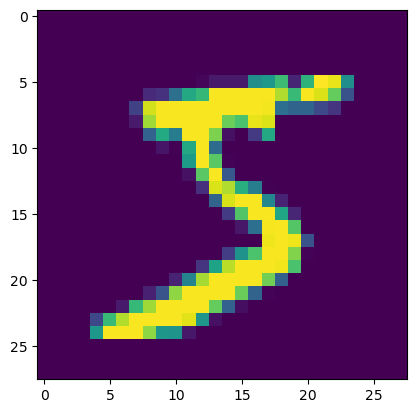

In [323]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0].reshape(28, 28))

In [324]:
train_labels_one_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [325]:
train_images.shape

(60000, 784)

In [326]:
model.fit(x_inputs=[train_images.reshape(-1, 1, 784)], y=train_labels_one_hot, batch_size=32, epochs=1)

X.shape: (1875, 32, 1, 784)
y.shape: (1875, 32, 10)
Epochs: 1/1
Batch loss: 173.85897284225467
----------------------------------------------------------------------------------------------------
OG-OP: []neg_a342f436-db(neg)
OG-OP.val.shape: []neg_a342f436-db(neg) :: (1,)
BACKWARD.Leafs.ops: [[]/_36214009-49(/)]
BACKWARD.Leafs.val.shape: [(1,)]
BACKWARD.Leafs.adjoint.shape: [(1,)]
-||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||--||-
----------------------------------------------------------------------------------------------------
BACKWARD.Vars.ops: [[CrossEntropy]+(+)]
BACKWARD.Vars.val.shape: [(1,)]
----------------------------------------------------------------------------------------------------
BACKWARD.Self.val.shape: []neg_a342f436-db(neg) :: (1,)
BACKWARD.Self.adjoint.shape: []neg_a342f436-db(neg) :: (1,)
----------------------------------------------------------------------------------------------------
_||__||__||__||__||__||__||__||__||__||__||

ValueError: cannot reshape array of size 10240 into shape (32,1,10)

In [ ]:
(np.random.rand(1,700) @ np.random.rand(700,10)).shape

(1, 10)

In [289]:
prod = 1
for p in [dic["one"], dic["two"]]:
    prod = p * prod

TypeError: can't multiply sequence by non-int of type 'list'

In [332]:
dic["one"] * dic["two"]

array([[-0.64529615,  3.80340164, -0.64529615, ..., -0.64529615,
         1.08906916, -0.53371161],
       [-0.64529615,  4.38509727,  0.14689139, ..., -0.64529615,
        -0.03256287,  0.54942437],
       [-0.64529615, -0.64529615, -0.42254812, ..., -0.64529615,
        -0.64529615,  0.8831295 ],
       ...,
       [ 2.63264921,  0.90012628, -0.46542042, ..., -0.64529615,
        -0.55148844,  0.71581578],
       [ 1.03637987, -0.64529615,  0.27455109, ..., -0.64529615,
         1.22045284,  0.15575848],
       [-0.64529615,  1.46898143,  0.11581598, ..., -0.64529615,
         0.95595952,  1.35268787]])

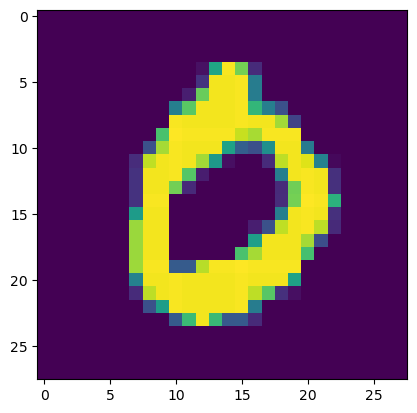

In [ ]:
plt.imshow(test_images[3])

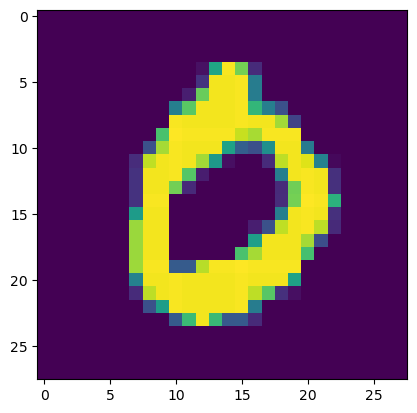

In [78]:
plt.imshow(test_images[3])
preds = np.argmax(model.predict(x_inputs=[test_images.reshape(-1, 1, 784)]), axis=-1)

In [79]:
sum(preds.reshape(-1) == test_labels) / len(test_labels)

0.7657

In [589]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [22]:
import numpy as np

# Define the softmax function with axis argument
def _softmax(x, axis=-1):
    exp_x = np.exp(x - np.max(x, axis=axis, keepdims=True))  # Subtract max for numerical stability
    return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

# Example usage
X = np.array([[2.0, 1.0, 0.1],
              [1.0, 2.0, 0.1]])

_softmax(X, axis=-1)


array([[0.65900114, 0.24243297, 0.09856589],
       [0.24243297, 0.65900114, 0.09856589]])

In [175]:
x = OpNode("var")
y = OpNode("ln")(OpNode("cos")(x * x)) + OpNode("sin")(x)
y.vars

[[]ln_5e94ded3-b2(ln), []sin_e623ff79-ae(sin)]

In [176]:
x_sub = 1

x.substitute(x_sub)

ordered_operations, _ = topological_DFS(y)

for op in ordered_operations:
    op.compute()
    print(op, ":", op.val)

print("-"*50)
print(func(x_sub))

[]var_2a745d76-a8(var) : 1
[]const_7ff5cccb-9f(const) : 2
[]**_a7fb4035-f7(**) : 1
[]cos_7028ed90-b9(cos) : 0.5403023058681398
[]ln_5e94ded3-b2(ln) : -0.6156264703860141
[]sin_e623ff79-ae(sin) : 0.8414709848078965
[]+_653df75c-54(+) : 0.22584451442188236
--------------------------------------------------
0.22584451442188236


In [177]:
for op in reversed(ordered_operations):
    op.adjoint = None
    op.compute_adjoint()
    print(f"[{op}] adjoint:", op.adjoint)
    print("---------------------")

print("="*50)
print(d_func(x_sub))

[[]+_653df75c-54(+)] adjoint: 1
---------------------
+++ []sin_e623ff79-ae(sin)
[[]sin_e623ff79-ae(sin)] adjoint: 1
---------------------
+++ []ln_5e94ded3-b2(ln)
[[]ln_5e94ded3-b2(ln)] adjoint: 1
---------------------
+++ []cos_7028ed90-b9(cos)
[[]cos_7028ed90-b9(cos)] adjoint: 1.8508157176809255
---------------------
+++ []**_a7fb4035-f7(**)
[[]**_a7fb4035-f7(**)] adjoint: -1.557407724654902
---------------------
+++ []const_7ff5cccb-9f(const)
[[]const_7ff5cccb-9f(const)] adjoint: 0.0
---------------------
+++ []var_2a745d76-a8(var)
+++ []var_2a745d76-a8(var)
[[]var_2a745d76-a8(var)] adjoint: -2.5745131434416644
---------------------
-2.5745131434416644


In [137]:
(2 * OpNode("var")).vars

[const_55f(const), var_513(var)]

In [178]:
x1 = OpNode("var")
x2 = OpNode("var")
y_ = OpNode("ln")(OpNode("cos")(x1 * x2)) + OpNode("sin")(x1) + 2 * x2

y_.vars, y_.leafs

([[]+_92be5ef1-7c(+), []*_65038e37-ed(*)], set())

In [83]:
# v1 = x1 * x2
# v2 = cos(v1)
# v3 = ln(v2)
# v4 = sin(x1)
# v5 = 2 * x2
# v6 = v5 + v4
# v7 = v3 + v6

# av7 = 1
# av6 = av7 * dv7 / dv6 = 1 * 1 = 1
# av5 = av6 * dv6 / dv5 = 1 * 1 = 1
# av4 = av6 * dv6 / dv4 = 1 * 1 = 1
# av3 = av7 * dv7 / dv3 = 1 * 1 = 1
# av2 = av3 * dv3 / dv2 = 1 / v2
# av1 = av2 * dv2 / dv1 = -sin(v1)
# ax2 = av1 * dv1 / dx2 + av5 * dv5 / dx2 = x1 + 2
# ax1 = av1 * dv1 / dx1 + av4 * dv4 / dx1 = x2 + cos(x1)


In [179]:
topological_DFS(y_)

([[]var_050142af-7b(var),
  []var_d0e192b3-0f(var),
  []*_ba213ca3-6c(*),
  []cos_3d837e6c-1a(cos),
  []ln_bdc44662-2f(ln),
  []sin_b897be66-ff(sin),
  []+_92be5ef1-7c(+),
  []const_6af07832-02(const),
  []*_65038e37-ed(*),
  []+_8a6084ba-9f(+)],
 [5, 5, 4, 3, 2, 2, 1, 2, 1, 0])

In [180]:
x1.substitute(5)
x2.substitute(9)

for op in DFS(y_):
    # print(op)
    op.compute()
    print(op, ":", op.val)

[]var_050142af-7b(var) : 5
[]var_d0e192b3-0f(var) : 9
[]*_ba213ca3-6c(*) : 45
[]cos_3d837e6c-1a(cos) : 0.5253219888177297
[]ln_bdc44662-2f(ln) : -0.6437438923557037
[]var_050142af-7b(var) : 5
[]sin_b897be66-ff(sin) : -0.9589242746631385
[]+_92be5ef1-7c(+) : -1.6026681670188423
[]const_6af07832-02(const) : 2
[]var_d0e192b3-0f(var) : 9
[]*_65038e37-ed(*) : 18
[]+_8a6084ba-9f(+) : 16.39733183298116


In [18]:

DFS(y_)[7].vars, DFS(y_)[7].vars[0].val, DFS(y_)[7].vars[1].val

([ln_f1e(ln), sin_c38(sin)], -0.6437438923557037, -0.9589242746631385)

In [12]:
DFS(y_)[2].leafs

[cos_f7e(cos)]

In [13]:
xx1 = 5
xx2 = 9

ln(cos(xx1 * xx2)) + sin(xx1) + 2 * xx2

16.39733183298116

In [108]:
x.substitute(5)
x.val

5

In [181]:
import networkx as nx
import matplotlib.pyplot as plt

def extract_edges(node, visited=None):
    if visited is None:
        visited = set()
    edges = []
    if node in visited:
        return edges
    visited.add(node)
    for leaf in node.vars:
        lim = len(node.op) + 5
        name = node.name[:lim]
        l_lim = len(leaf.op) + 5
        l_name = leaf.name[:l_lim]
        edges.append((name, l_name))
        edges.extend(extract_edges(leaf, visited))
    return edges

In [183]:
pip show networkx

Name: networkx
Version: 3.3
Summary: Python package for creating and manipulating graphs and networks
Home-page: https://networkx.org/
Author: 
Author-email: Aric Hagberg <hagberg@lanl.gov>
License: 
Location: c:\Users\oussa\anaconda3\Lib\site-packages
Requires: 
Required-by: intake, scikit-image
Note: you may need to restart the kernel to use updated packages.


In [189]:
len(edges)

29

In [197]:
import networkx as nx

def remove_cycles(edges):
    # Create a directed graph from the list of edges
    G = nx.DiGraph(edges)

    try:
        # Find a cycle in the graph
        cycle = nx.find_cycle(G, orientation='original')
        while cycle:
            # Remove one edge from the cycle (use source and target nodes only)
            G.remove_edge(cycle[0][0], cycle[0][1])
            print(f"Removed edge: {cycle[0][0]} -> {cycle[0][1]}")
            # Try to find another cycle
            cycle = nx.find_cycle(G, orientation='original')
    except nx.exception.NetworkXNoCycle:
        pass

    return G

def no_cycle_graph(G):
    G = nx.DiGraph(list(G.edges))
    try:
        # Find a cycle in the graph
        cycle = nx.find_cycle(G, orientation='original')
        while cycle:
            # Remove one edge from the cycle (use source and target nodes only)
            G.remove_edge(cycle[0][0], cycle[0][1])
            print(f"Removed edge: {cycle[0][0]} -> {cycle[0][1]}")
            # Try to find another cycle
            cycle = nx.find_cycle(G, orientation='original')
    except nx.exception.NetworkXNoCycle:
        pass

    return G

# Remove cycles
G = remove_cycles(edges)

# Print the edges of the resulting DAG
print("Edges of the resulting DAG:")
print(len(list(G.edges)))



Removed edge: [dense -> [dense4]mat
Removed edge: [dense -> [dense3]mat
Removed edge: [dense -> [dense2]mat
Removed edge: [dense -> [dense1]mat
Removed edge: [dense -> [dense1]
Removed edge: [dense -> [dense2]
Removed edge: [dense -> [dense3]
Removed edge: [dense4] -> []-_1b
Removed edge: [dense4] -> [dense
Removed edge: [dense4] -> [dense4]
Edges of the resulting DAG:
18


Removed edge: [dense4] -> [dense4]mat
Removed edge: [dense4] -> [dense
Removed edge: [dense4] -> []-_1b
Removed edge: [dense4] -> [dense4]
Removed edge: [dense4]mat -> [dense
Removed edge: [dense -> [dense3]
Removed edge: [dense -> [dense2]
Removed edge: [dense -> [dense1]
Is the graph a DAG? True


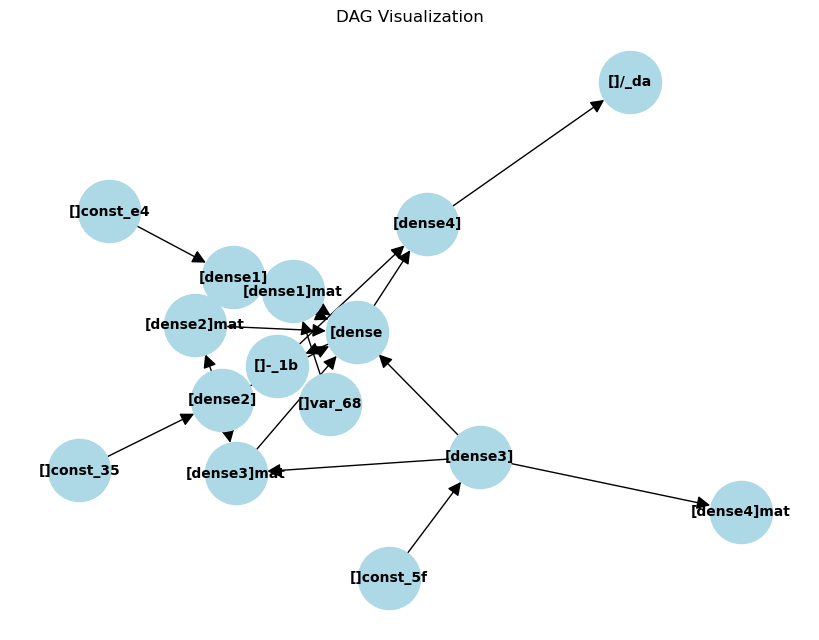

In [198]:
edges = extract_edges(model.output.get_output_node_())

# Create a directed graph using networkx
G = nx.DiGraph(directed=True)
G.add_edges_from(edges)
G_reversed = G.reverse(copy=False)
G_reversed = no_cycle_graph(G_reversed)

is_dag = nx.is_directed_acyclic_graph(G_reversed)
print("Is the graph a DAG?", is_dag)

pos = nx.spring_layout(G_reversed)
# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_reversed)  # You can change this to other layouts like nx.shell_layout, etc.
nx.draw(G_reversed, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
plt.title("DAG Visualization")
plt.show()

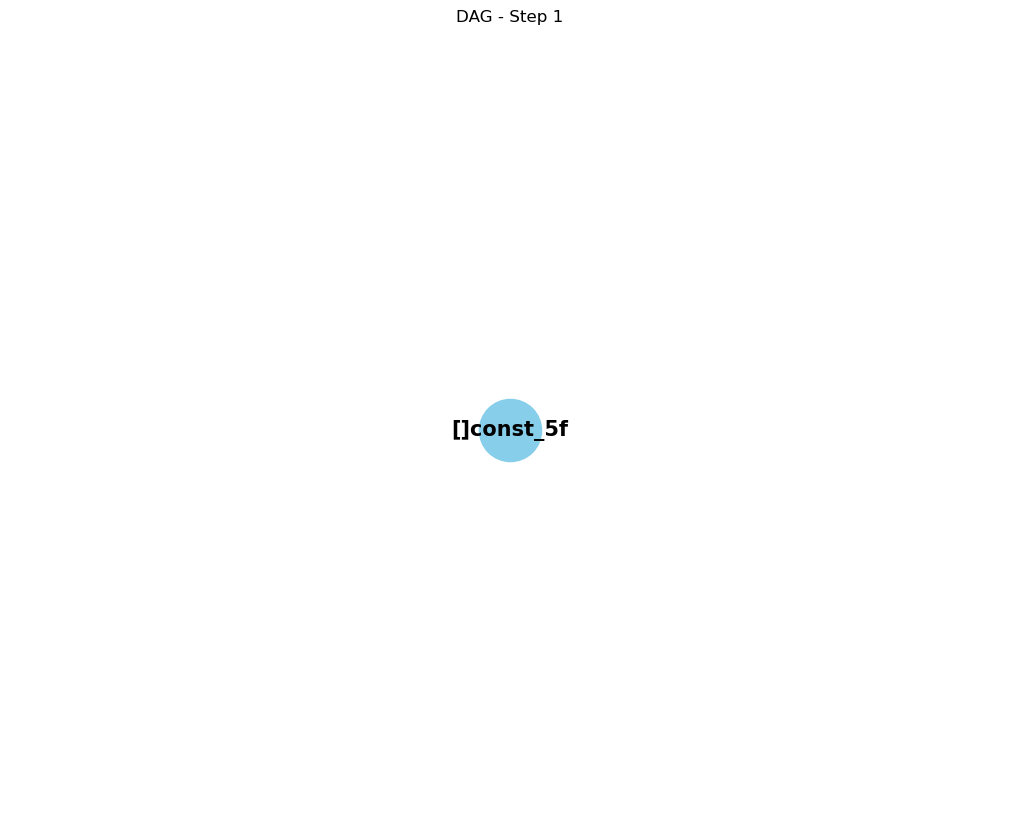

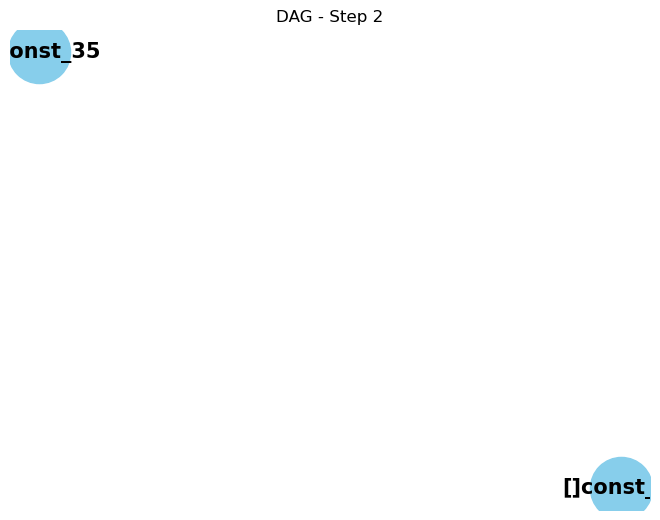

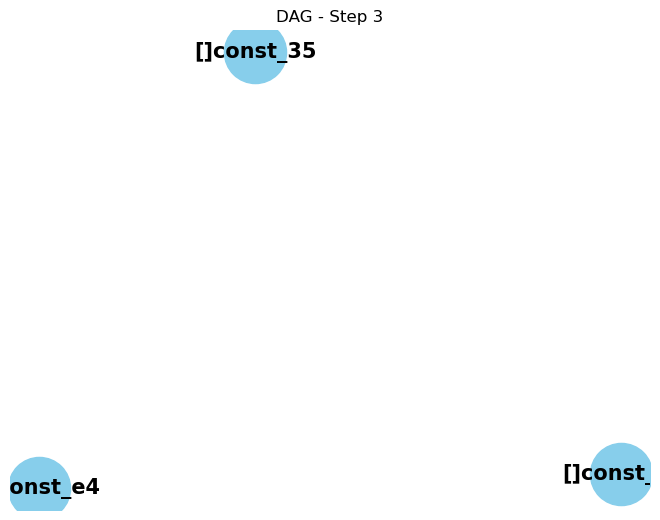

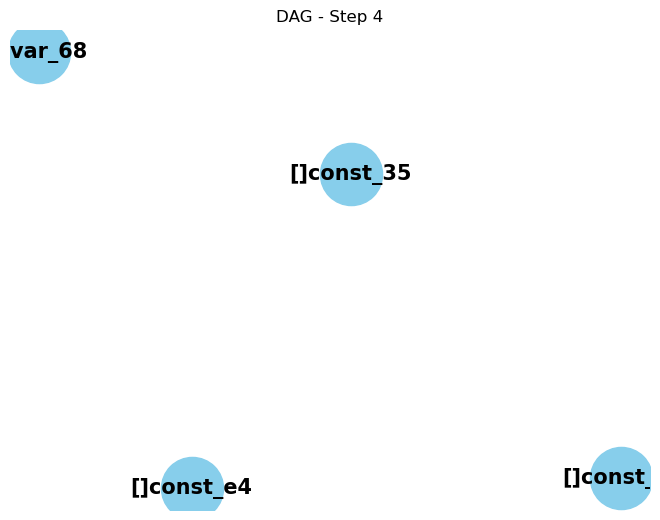

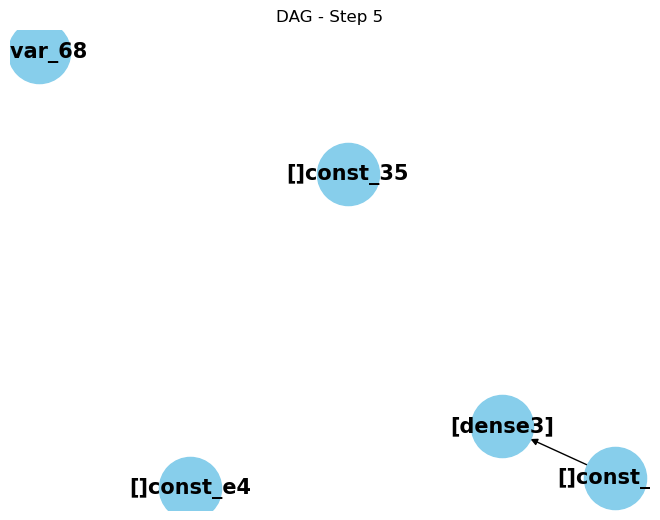

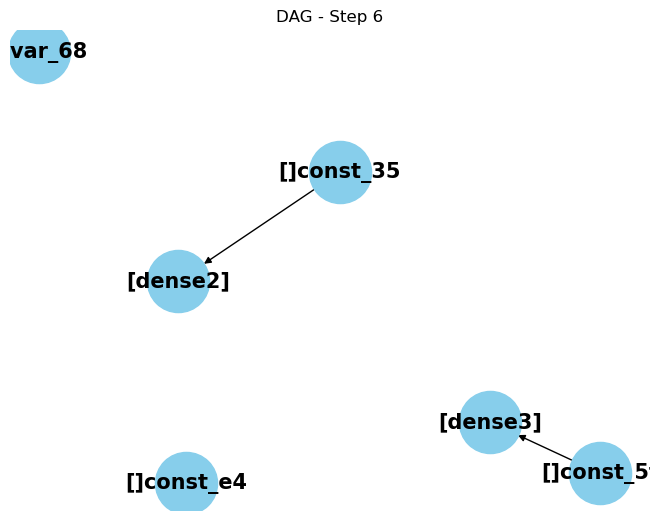

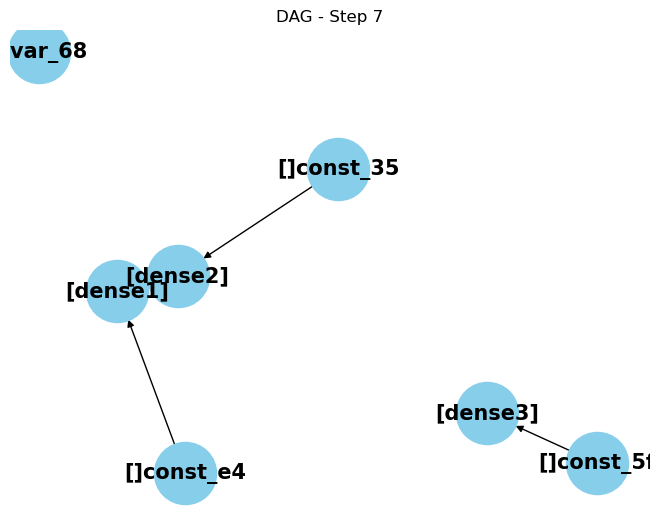

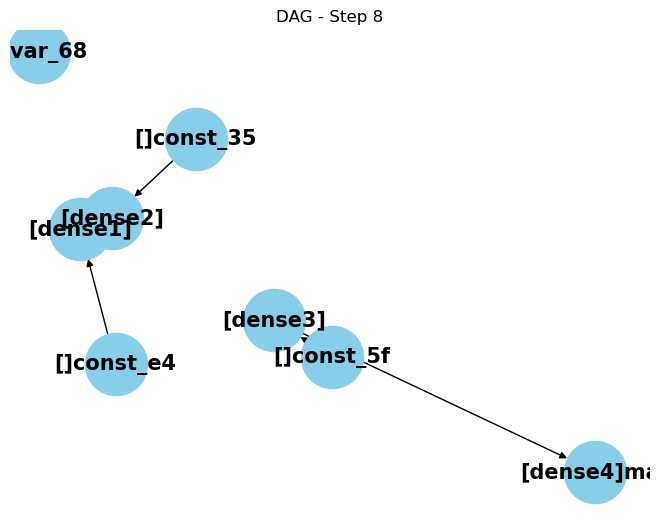

KeyboardInterrupt: 

In [199]:
def draw_dag_sequentially(G):
    G = no_cycle_graph(G)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 8))
    nodes_in_topological_order = list(nx.topological_sort(G))

    for i in range(len(nodes_in_topological_order)):
        subgraph_nodes = nodes_in_topological_order[:i + 1]
        subgraph = G.subgraph(subgraph_nodes)

        plt.clf()  # Clear the current plot
        nx.draw(subgraph, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=15, font_weight="bold", arrows=True)
        plt.title(f"DAG - Step {i + 1}")
        plt.pause(1)  # Pause to display each step

    plt.show()

# Draw the DAG sequentially
draw_dag_sequentially(G_reversed)


In [ ]:
for op, _ in ordered_operations:
    op.compute()
    print(op.val)

5
5
25
0.9912028118634736
-0.008836111843672067
5
-0.9589242746631385
0.9677603865068105


In [87]:
func(5)



-0.9677603865068105